# 1. 개발 환경 세팅하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score


In [2]:
import matplotlib.font_manager as fm

# 사용할 한글 폰트 파일 경로 지정 (예: 윈도우의 Malgun Gothic)
font_path = 'C:/Windows/Fonts/malgun.ttf'

# 폰트 이름 가져오기
font_name = fm.FontProperties(fname=font_path).get_name()

print(f"가져온 폰트 이름: {font_name}")

# matplotlib의 rcParams 설정을 통해 폰트 변경
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지 설정

print(f"matplotlib 폰트 설정 완료: {plt.rcParams['font.family']}")

가져온 폰트 이름: Malgun Gothic
matplotlib 폰트 설정 완료: ['Malgun Gothic']


# 파일 불러오기

In [3]:
df = "C:/Users/PC/Documents/codeit_study/train_df.csv"

In [4]:
try:
    df = pd.read_csv(df, encoding='utf-8', on_bad_lines='skip')
    print("UTF-8 인코딩으로 데이터 로드에 성공했습니다.")
except UnicodeDecodeError:
    df = pd.read_csv(df, encoding='cp949', on_bad_lines='skip')
    print("CP949 인코딩으로 데이터 로드에 성공했습니다.")

UTF-8 인코딩으로 데이터 로드에 성공했습니다.


In [5]:
df

,date,line,station_number,station_name,direction,stn,ta,wd,ws,rn_day,rn_hr1,hm,si,chi,congestion,hour,date_dt,is_weekend_or_holiday
0,2021010100,1,150,서울역,상선,419,-9.6,291.1,3.3,0.0,0.0,52.477,0.184300,-12.6,0,0,2021-01-01,1
1,2021010105,1,150,서울역,상선,419,-9.3,124.7,2.4,0.0,0.0,70.292,0.242800,-10.3,1,5,2021-01-01,1
2,2021010106,1,150,서울역,상선,419,-9.3,126.2,1.7,0.0,0.0,55.452,0.302100,-10.1,2,6,2021-01-01,1
3,2021010107,1,150,서울역,상선,419,-9.1,145.7,1.3,0.0,0.0,51.202,0.605900,-9.7,3,7,2021-01-01,1
4,2021010108,1,150,서울역,상선,419,-8.5,194.2,0.6,0.0,0.0,62.856,0.000000,-9.7,3,8,2021-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15589828,2023123119,8,2828,남위례,하선,572,0.6,0.0,0.0,7.0,0.0,83.100,0.224000,0.0,18,19,2023-12-31,1
15589829,2023123120,8,2828,남위례,하선,572,0.0,354.7,0.0,7.0,0.0,84.700,0.064700,-0.6,17,20,2023-12-31,1
15589830,2023123121,8,2828,남위례,하선,572,-0.6,0.0,0.0,7.0,0.0,85.100,0.160700,-1.1,21,21,2023-12-31,1
15589831,2023123122,8,2828,남위례,하선,572,-0.8,0.0,0.0,7.0,0.0,85.600,0.198200,-1.3,18,22,2023-12-31,1


# 데이터 확인 및 전처리

In [6]:
df.head()

,date,line,station_number,station_name,direction,stn,ta,wd,ws,rn_day,rn_hr1,hm,si,chi,congestion,hour,date_dt,is_weekend_or_holiday
0,2021010100,1,150,서울역,상선,419,-9.6,291.1,3.3,0.0,0.0,52.477,0.1843,-12.6,0,0,2021-01-01,1
1,2021010105,1,150,서울역,상선,419,-9.3,124.7,2.4,0.0,0.0,70.292,0.2428,-10.3,1,5,2021-01-01,1
2,2021010106,1,150,서울역,상선,419,-9.3,126.2,1.7,0.0,0.0,55.452,0.3021,-10.1,2,6,2021-01-01,1
3,2021010107,1,150,서울역,상선,419,-9.1,145.7,1.3,0.0,0.0,51.202,0.6059,-9.7,3,7,2021-01-01,1
4,2021010108,1,150,서울역,상선,419,-8.5,194.2,0.6,0.0,0.0,62.856,0.0000,-9.7,3,8,2021-01-01,1


In [7]:
df.tail(5)

,date,line,station_number,station_name,direction,stn,ta,wd,ws,rn_day,rn_hr1,hm,si,chi,congestion,hour,date_dt,is_weekend_or_holiday
15589828,2023123119,8,2828,남위례,하선,572,0.6,0.0,0.0,7.0,0.0,83.1,0.224000,0.0,18,19,2023-12-31,1
15589829,2023123120,8,2828,남위례,하선,572,0.0,354.7,0.0,7.0,0.0,84.7,0.064700,-0.6,17,20,2023-12-31,1
15589830,2023123121,8,2828,남위례,하선,572,-0.6,0.0,0.0,7.0,0.0,85.1,0.160700,-1.1,21,21,2023-12-31,1
15589831,2023123122,8,2828,남위례,하선,572,-0.8,0.0,0.0,7.0,0.0,85.6,0.198200,-1.3,18,22,2023-12-31,1
15589832,2023123123,8,2828,남위례,하선,572,-1.3,110.7,0.1,7.0,0.0,85.6,0.083808,-1.9,22,23,2023-12-31,1


In [8]:
df.describe()

,date,line,station_number,stn,ta,wd,ws,rn_day,rn_hr1,hm,si,chi,congestion,hour,is_weekend_or_holiday
count,1.558983e+07,1.558983e+07,1.558983e+07,1.558983e+07,1.558983e+07,1.558983e+07,1.558983e+07,1.558983e+07,1.558983e+07,1.558983e+07,1.558983e+07,1.558983e+07,1.558983e+07,1.558983e+07,1.558983e+07
mean,2.022071e+09,4.124217e+00,1.729761e+03,4.286294e+02,1.408039e+01,1.846901e+02,1.688315e+00,2.232652e+00,1.671783e-01,6.313865e+01,9.455763e-01,1.433959e+01,2.263745e+01,1.330000e+01,3.203266e-01
std,8.194350e+05,2.205314e+00,1.195592e+03,1.410620e+02,1.101029e+01,1.022971e+02,1.236861e+00,9.869582e+00,1.329990e+00,2.100603e+01,8.838278e-01,1.201910e+01,1.924069e+01,6.148984e+00,4.666021e-01
min,2.021010e+09,1.000000e+00,1.500000e+02,9.800000e+01,-2.520000e+01,-9.900000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+00,0.000000e+00,-2.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.021100e+09,2.000000e+00,4.100000e+02,4.070000e+02,5.700000e+00,9.550000e+01,8.000000e-01,0.000000e+00,0.000000e+00,4.720000e+01,2.200000e-01,5.100000e+00,9.000000e+00,8.000000e+00,0.000000e+00
50%,2.022071e+09,4.000000e+00,1.908000e+03,4.180000e+02,1.550000e+01,1.976000e+02,1.407000e+00,0.000000e+00,0.000000e+00,6.300000e+01,6.447545e-01,1.570000e+01,1.900000e+01,1.300000e+01,0.000000e+00
75%,2.023041e+09,6.000000e+00,2.633000e+03,4.350000e+02,2.330000e+01,2.725000e+02,2.300000e+00,0.000000e+00,0.000000e+00,7.990000e+01,1.500000e+00,2.470000e+01,3.100000e+01,1.800000e+01,1.000000e+00
max,2.023123e+09,8.000000e+00,9.006000e+03,8.890000e+02,3.960000e+01,3.600000e+02,1.660000e+01,3.815000e+02,1.365000e+02,1.000000e+02,3.770000e+00,3.750000e+01,2.890000e+02,2.300000e+01,1.000000e+00


In [9]:
df.isnull().sum()

date                     0
line                     0
station_number           0
station_name             0
direction                0
stn                      0
ta                       0
wd                       0
ws                       0
rn_day                   0
rn_hr1                   0
hm                       0
si                       0
chi                      0
congestion               0
hour                     0
date_dt                  0
is_weekend_or_holiday    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15589833 entries, 0 to 15589832
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   date                   int64  
 1   line                   int64  
 2   station_number         int64  
 3   station_name           object 
 4   direction              object 
 5   stn                    int64  
 6   ta                     float64
 7   wd                     float64
 8   ws                     float64
 9   rn_day                 float64
 10  rn_hr1                 float64
 11  hm                     float64
 12  si                     float64
 13  chi                    float64
 14  congestion             int64  
 15  hour                   int64  
 16  date_dt                object 
 17  is_weekend_or_holiday  int64  
dtypes: float64(8), int64(7), object(3)
memory usage: 2.1+ GB


In [11]:
df.isna().sum()

date                     0
line                     0
station_number           0
station_name             0
direction                0
stn                      0
ta                       0
wd                       0
ws                       0
rn_day                   0
rn_hr1                   0
hm                       0
si                       0
chi                      0
congestion               0
hour                     0
date_dt                  0
is_weekend_or_holiday    0
dtype: int64

In [12]:
print(df.duplicated().sum())

0


In [13]:
df.drop('date', axis=1, inplace=True)

- 데이터의 누락값, NA값, 중복값 없어진 것을 확인! 
- 'date' 칼럼은 연도, 월, 일, 시간으로 나타난 정보인데 각각 칼럼별로 나뉘어져 있기 때문에 삭제처리

In [14]:
df['date_dt'] = pd.to_datetime(df['date_dt'])

In [15]:
import numpy as np
import pandas as pd

# 날짜형 변환 및 월 정보 추가
df['date_dt'] = pd.to_datetime(df['date_dt'])
df['month'] = df['date_dt'].dt.month

# 여름철 체감온도 함수 (5~9월)
def summer_chi(ta, rh):
    try:
        tw = (
            ta * np.arctan(0.151977 * np.sqrt(rh + 8.313659)) +
            np.arctan(ta + rh) -
            np.arctan(rh - 1.676331) +
            0.00391838 * rh ** 1.5 * np.arctan(0.023101 * rh) -
            4.686035
        )
        chi = -0.2442 + 0.55399 * tw + 0.45535 * ta - 0.0022 * tw**2 - 0.00278 * tw * ta + 3.0
        return chi
    except:
        return np.nan

# 겨울철 체감온도 함수 (10~4월)
def winter_chi(ta, v):
    try:
        v_16 = v ** 0.16
        chi = 13.12 + 0.6215 * ta - 11.37 * v_16 + 0.3965 * v_16 * ta
        return chi
    except:
        return np.nan

# 전체 체감온도 계산
def calculate_chi(row):
    if 5 <= row['month'] <= 9:
        return summer_chi(row['ta'], row['hm'])
    else:
        return winter_chi(row['ta'], row['ws'])

# 계산 적용
df['calculated_chi'] = df.apply(calculate_chi, axis=1)

# 반올림
df['chi_rounded'] = df['chi'].round(1)
df['calculated_chi_rounded'] = df['calculated_chi'].round(1)

# 일치 여부 확인
df['is_same'] = df['chi_rounded'] == df['calculated_chi_rounded']
match_rate = df['is_same'].mean()

# 결과 출력
print(f'체감온도(소수 1자리 기준) 일치율: {match_rate * 100:.2f}%')


체감온도(소수 1자리 기준) 일치율: 0.49%


In [16]:
# 차이 계산 (반올림 전 기준 차이)
df['chi_diff'] = df['chi'] - df['calculated_chi']

# 반올림 후 기준으로 다르다고 판단된 경우 필터링
not_matched_df = df[df['is_same'] == False]

# 차이 통계
diff_stats = not_matched_df['chi_diff'].describe()

# 결과 출력
print("체감온도 불일치 구간 통계 (소수점 전 기준 차이):")
print(diff_stats)

# 절댓값 기준 평균 오차도 확인
mean_abs_error = not_matched_df['chi_diff'].abs().mean()
print(f"\n불일치한 경우 평균 절댓값 차이: {mean_abs_error:.2f}°C")


체감온도 불일치 구간 통계 (소수점 전 기준 차이):
count    1.551299e+07
mean    -6.075349e-02
std      3.256133e+00
min     -2.067645e+01
25%     -2.263946e+00
50%     -6.716838e-01
75%      2.750149e+00
max      8.363749e+00
Name: chi_diff, dtype: float64

불일치한 경우 평균 절댓값 차이: 2.70°C


| 통계항목           | 값 (°C)         | 의미                                                     |
| -------------- | -------------- | ------------------------------------------------------ |
| `count`        | **15,512,999** | 비교에 사용된 데이터 개수                                         |
| `mean`         | **-0.06°C**    | 평균적으로 계산된 chi가 실제보다 약간 **높다**는 뜻 (실제 chi - 계산 chi < 0) |
| `std`          | **3.26°C**     | 오차의 표준편차. 대부분 값은 ±3.26°C 안에 분포                         |
| `min`          | **-20.68°C**   | 계산된 값보다 실제 chi가 20.68도 **낮은 경우**가 있었다는 뜻               |
| `25%`          | **-2.26°C**    | 하위 25%는 오차가 -2.26°C 이하                                 |
| `50%` (median) | **-0.67°C**    | 절반은 -0.67°C 이하                                         |
| `75%`          | **+2.75°C**    | 상위 25%는 오차가 2.75°C 이상                                  |
| `max`          | **+8.36°C**    | 계산된 값보다 실제 chi가 8.36도 **높은 경우**가 있었다는 뜻                |


- 차이가 큰 이유 
    - 모델링 과정 중 잘못 예측한 경우 ? 
        - 모델링 과정 중 문제가 있었다고 하더라도 일치율이 0.49면 좀 .... 내가 따로 구한 것을 chi 라고 생각하고 진행을 해야할까 ? 

In [17]:
# 불쾌지수 계산 함수
def calculate_discomfort_index(ta, rh):
    try:
        return 0.81 * ta + 0.01 * rh * (0.99 * ta - 14.3) + 46.3
    except:
        return np.nan

# 적용
df['discomfort_index'] = df.apply(lambda row: calculate_discomfort_index(row['ta'], row['hm']), axis=1)

# 예시 출력
print(df[['ta', 'hm', 'discomfort_index']].head())


    ta      hm  discomfort_index
0 -9.6  52.477         26.032375
1 -9.3  70.292         22.243460
2 -9.3  55.452         25.731898
3 -9.1  51.202         26.994326
4 -8.5  62.856         25.137260


- 불쾌지수 

| DI 값  | 해석               |
| ----- | ---------------- |
| 68 이하 | 쾌적               |
| 68–75 | 불쾌감 느끼는 사람 증가 시작 |
| 75–80 | 절반 이상이 불쾌감 느낌    |
| 80 이상 | 대부분 불쾌감을 느낌      |


In [18]:
# 불쾌지수 등급 분류
def classify_di(di):
    if di <= 68:
        return '쾌적'
    elif di <= 75:
        return '불쾌 증가'
    elif di <= 80:
        return '절반 이상 불쾌'
    else:
        return '매우 불쾌'

df['di_level'] = df['discomfort_index'].apply(classify_di)

# 확인
print(df[['discomfort_index', 'di_level']].value_counts())

discomfort_index  di_level
69.793510         불쾌 증가       1758
69.253807         불쾌 증가       1604
70.333213         불쾌 증가       1574
70.693015         불쾌 증가       1516
71.232718         불쾌 증가       1468
                              ... 
67.228435         쾌적             1
71.603009         불쾌 증가          1
46.025083         쾌적             1
76.593869         절반 이상 불쾌       1
45.043172         쾌적             1
Name: count, Length: 475650, dtype: int64


- 시간 강수량을 다 더하면 일 강수량이 나와야 하지 않을까 ? 

In [19]:
# 시간 강수량 합계 계산 (하루 단위)
hourly_rain_sum = df.groupby(['date_dt', 'station_name'])['rn_hr1'].sum().reset_index()
hourly_rain_sum.rename(columns={'rn_hr1': 'daily_rn_hr1_sum'}, inplace=True)


In [20]:
# 일 강수량 정보 추출
daily_rn_day = df[['date_dt', 'station_name', 'rn_day']].drop_duplicates()


In [21]:
# 병합
rain_compare = pd.merge(hourly_rain_sum, daily_rn_day, on=['date_dt', 'station_name'])

# 차이 계산
rain_compare['diff'] = (rain_compare['daily_rn_hr1_sum'] - rain_compare['rn_day']).round(2)


In [22]:
# 일치하는 경우 비율
match_rate = (rain_compare['diff'].abs() < 0.01).mean() * 100
print(f"일 강수량(rn_day)과 시간 강수량 합(rn_hr1)의 일치 비율: {match_rate:.2f}%")

# 불일치 샘플
rain_compare[rain_compare['diff'].abs() >= 0.01].head()


일 강수량(rn_day)과 시간 강수량 합(rn_hr1)의 일치 비율: 27.92%


,date_dt,station_name,daily_rn_hr1_sum,rn_day,diff
86,2021-01-01,동두천,0.028,0.890,-0.86
87,2021-01-01,동두천,0.028,0.000,0.03
88,2021-01-01,동두천,0.028,0.040,-0.01
89,2021-01-01,동두천,0.028,0.170,-0.14
90,2021-01-01,동두천,0.028,0.113,-0.08


In [23]:
# 1. 일 강수량 계산 (date_dt + station_name 기준)
new_rn_day = df.groupby(['date_dt', 'station_name'])['rn_hr1'].sum().reset_index()
new_rn_day.rename(columns={'rn_hr1': 'rn_day_new'}, inplace=True)

# 2. 원본 데이터와 병합
df = pd.merge(df.drop(columns=['rn_day']), new_rn_day, on=['date_dt', 'station_name'], how='left')

# 3. 컬럼 순서 정리 (선택)
cols = df.columns.tolist()
# rn_day_new를 rn_day로 이름 변경하여 기존 위치로
cols[cols.index('rn_day_new')] = 'rn_day'
df.columns = cols
df.rename(columns={'rn_day_new': 'rn_day'}, inplace=True)

# 4. 확인
print(df[['date_dt', 'station_name', 'hour', 'rn_hr1', 'rn_day']].head(10))


     date_dt station_name  hour  rn_hr1  rn_day
0 2021-01-01          서울역     0     0.0     0.0
1 2021-01-01          서울역     5     0.0     0.0
2 2021-01-01          서울역     6     0.0     0.0
3 2021-01-01          서울역     7     0.0     0.0
4 2021-01-01          서울역     8     0.0     0.0
5 2021-01-01          서울역     9     0.0     0.0
6 2021-01-01          서울역    10     0.0     0.0
7 2021-01-01          서울역    11     0.0     0.0
8 2021-01-01          서울역    12     0.0     0.0
9 2021-01-01          서울역    13     0.0     0.0


In [24]:
# 비가 오는데 습도가 0인 경우 필터링
weird_humidity = df[(df['rn_hr1'] > 0) & (df['hm'] == 0)]

print(f"이상 케이스 수: {len(weird_humidity)}")
display(weird_humidity[['date_dt', 'station_name', 'hour', 'rn_hr1', 'hm']].head())


이상 케이스 수: 0


,date_dt,station_name,hour,rn_hr1,hm


In [25]:
# 데이터 분할
df_weekday = df[df['is_weekend_or_holiday'] == 0]
df_weekend = df[df['is_weekend_or_holiday'] == 1]

- 열차 혼합도란 ? 
- ex ) 1시간동안 지나가는 열차들의 평균 혼잡도 = congesition
- 즉, 정원 대비 승차 인원으로 승차인과 좌석수가 일치할 경우 혼잡도를 34%로 산정한다. 
- 국토교통부의 지하철 혼잡도 기준 한 칸당 160명 기준(호설별 정원에 따라 상의하다.)

# EDA

## 통합 EDA

count    1.558983e+07
mean     2.263745e+01
std      1.924069e+01
min      0.000000e+00
25%      9.000000e+00
50%      1.900000e+01
75%      3.100000e+01
max      2.890000e+02
Name: congestion, dtype: float64


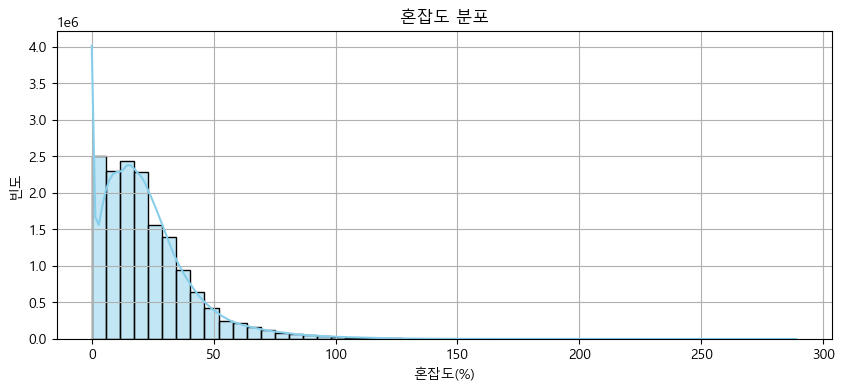

In [26]:
print(df['congestion'].describe())

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.histplot(df['congestion'], bins=50, kde=True, color='skyblue')
plt.title('혼잡도 분포')
plt.xlabel('혼잡도(%)')
plt.ylabel('빈도')
plt.grid(True)
plt.show()

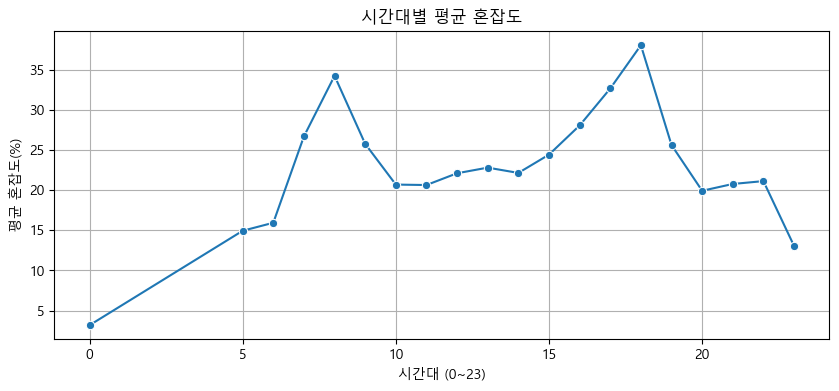

In [27]:
hourly_mean = df.groupby('hour')['congestion'].mean()

plt.figure(figsize=(10, 4))
sns.lineplot(x=hourly_mean.index, y=hourly_mean.values, marker='o')
plt.title("시간대별 평균 혼잡도")
plt.xlabel("시간대 (0~23)")
plt.ylabel("평균 혼잡도(%)")
plt.grid(True)
plt.show()


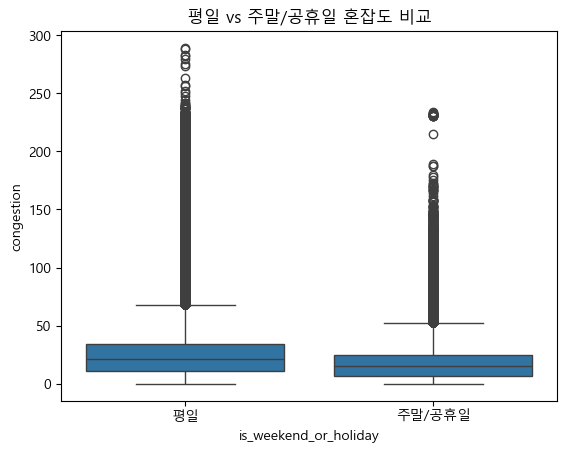

In [28]:
sns.boxplot(x='is_weekend_or_holiday', y='congestion', data=df)
plt.xticks([0, 1], ['평일', '주말/공휴일'])
plt.title("평일 vs 주말/공휴일 혼잡도 비교")
plt.show()


In [29]:
# 혼잡도 90% 이상 데이터
high_cong = df[df['congestion'] >= 90]

# 상위 시간대 기준 혼잡도 평균
print(high_cong['hour'].value_counts().sort_index())

hour
0       416
5      2013
6       117
7     23107
8     53320
9     12964
10      381
11      327
12      231
13      150
14       36
15      257
16      712
17    16748
18    52145
19     4570
20       52
21     1159
22     2276
23      142
Name: count, dtype: int64


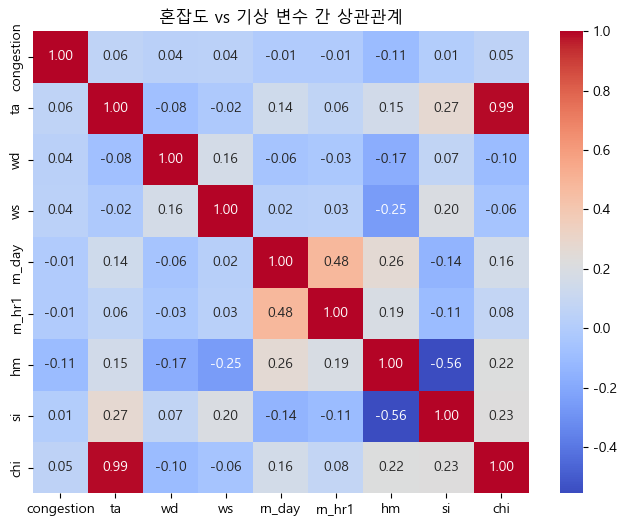

In [30]:
# 주요 기상 변수 + 혼잡도 선택
cols = ['congestion', 'ta', 'wd', 'ws', 'rn_day', 'rn_hr1', 'hm', 'si', 'chi']
corr = df[cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("혼잡도 vs 기상 변수 간 상관관계")
plt.show()

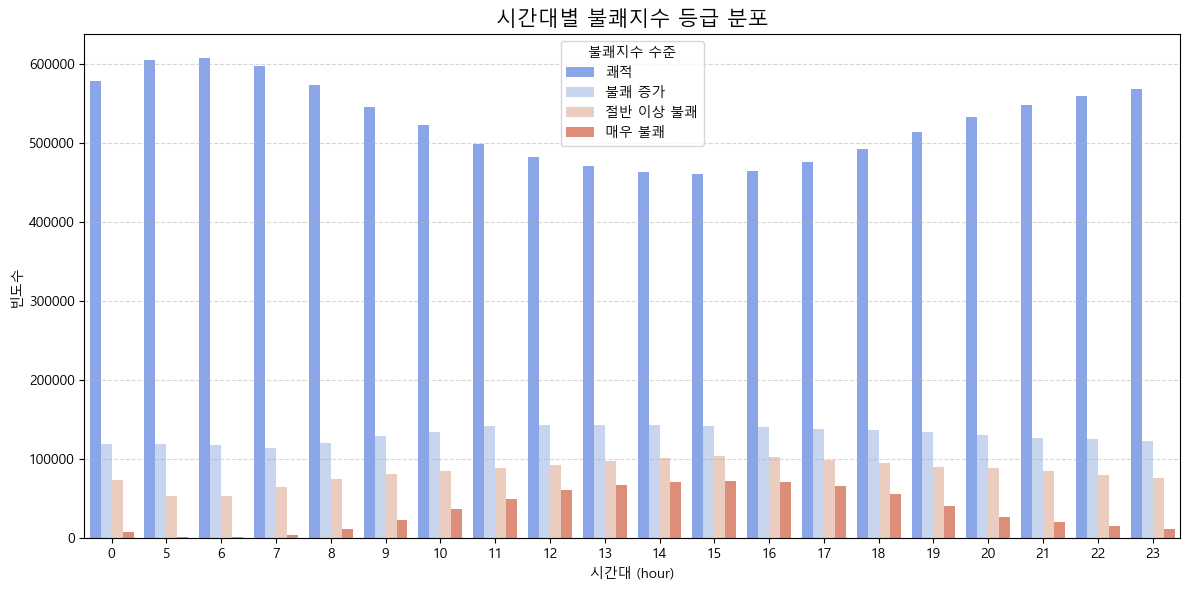

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시간대별 불쾌지수 카테고리 분포
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='hour', hue='di_level', order=sorted(df['hour'].unique()), palette='coolwarm')

plt.title('시간대별 불쾌지수 등급 분포', fontsize=15)
plt.xlabel('시간대 (hour)')
plt.ylabel('빈도수')
plt.legend(title='불쾌지수 수준')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## 평일 / 휴일 분류 EDA

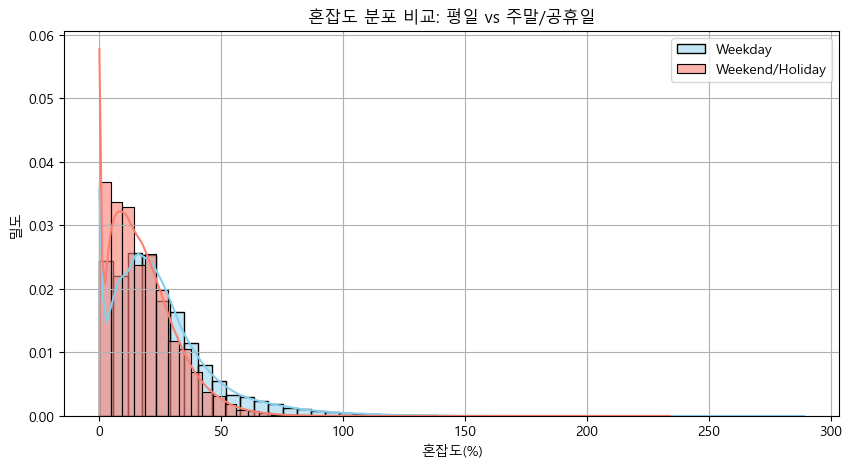

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df_weekday['congestion'], color='skyblue', label='Weekday', stat='density', bins=50, kde=True)
sns.histplot(df_weekend['congestion'], color='salmon', label='Weekend/Holiday', stat='density', bins=50, kde=True, alpha=0.6)
plt.title("혼잡도 분포 비교: 평일 vs 주말/공휴일")
plt.xlabel("혼잡도(%)")
plt.ylabel("밀도")
plt.legend()
plt.grid(True)
plt.show()

In [33]:
print("📌 혼잡도 통계 요약")
print("▶ 평일")
print(df_weekday['congestion'].describe())
print("\n▶ 주말/공휴일")
print(df_weekend['congestion'].describe())


📌 혼잡도 통계 요약
▶ 평일
count    1.059600e+07
mean     2.505205e+01
std      2.088204e+01
min      0.000000e+00
25%      1.100000e+01
50%      2.100000e+01
75%      3.400000e+01
max      2.890000e+02
Name: congestion, dtype: float64

▶ 주말/공휴일
count    4.993838e+06
mean     1.751410e+01
std      1.385104e+01
min      0.000000e+00
25%      7.000000e+00
50%      1.500000e+01
75%      2.500000e+01
max      2.340000e+02
Name: congestion, dtype: float64


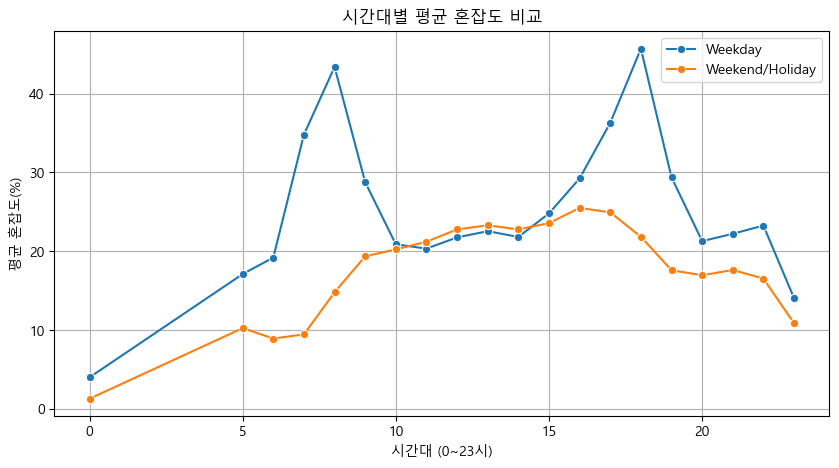

In [34]:
weekday_hourly = df_weekday.groupby('hour')['congestion'].mean()
weekend_hourly = df_weekend.groupby('hour')['congestion'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=weekday_hourly.index, y=weekday_hourly.values, label='Weekday', marker='o')
sns.lineplot(x=weekend_hourly.index, y=weekend_hourly.values, label='Weekend/Holiday', marker='o')
plt.title("시간대별 평균 혼잡도 비교")
plt.xlabel("시간대 (0~23시)")
plt.ylabel("평균 혼잡도(%)")
plt.grid(True)
plt.legend()
plt.show()


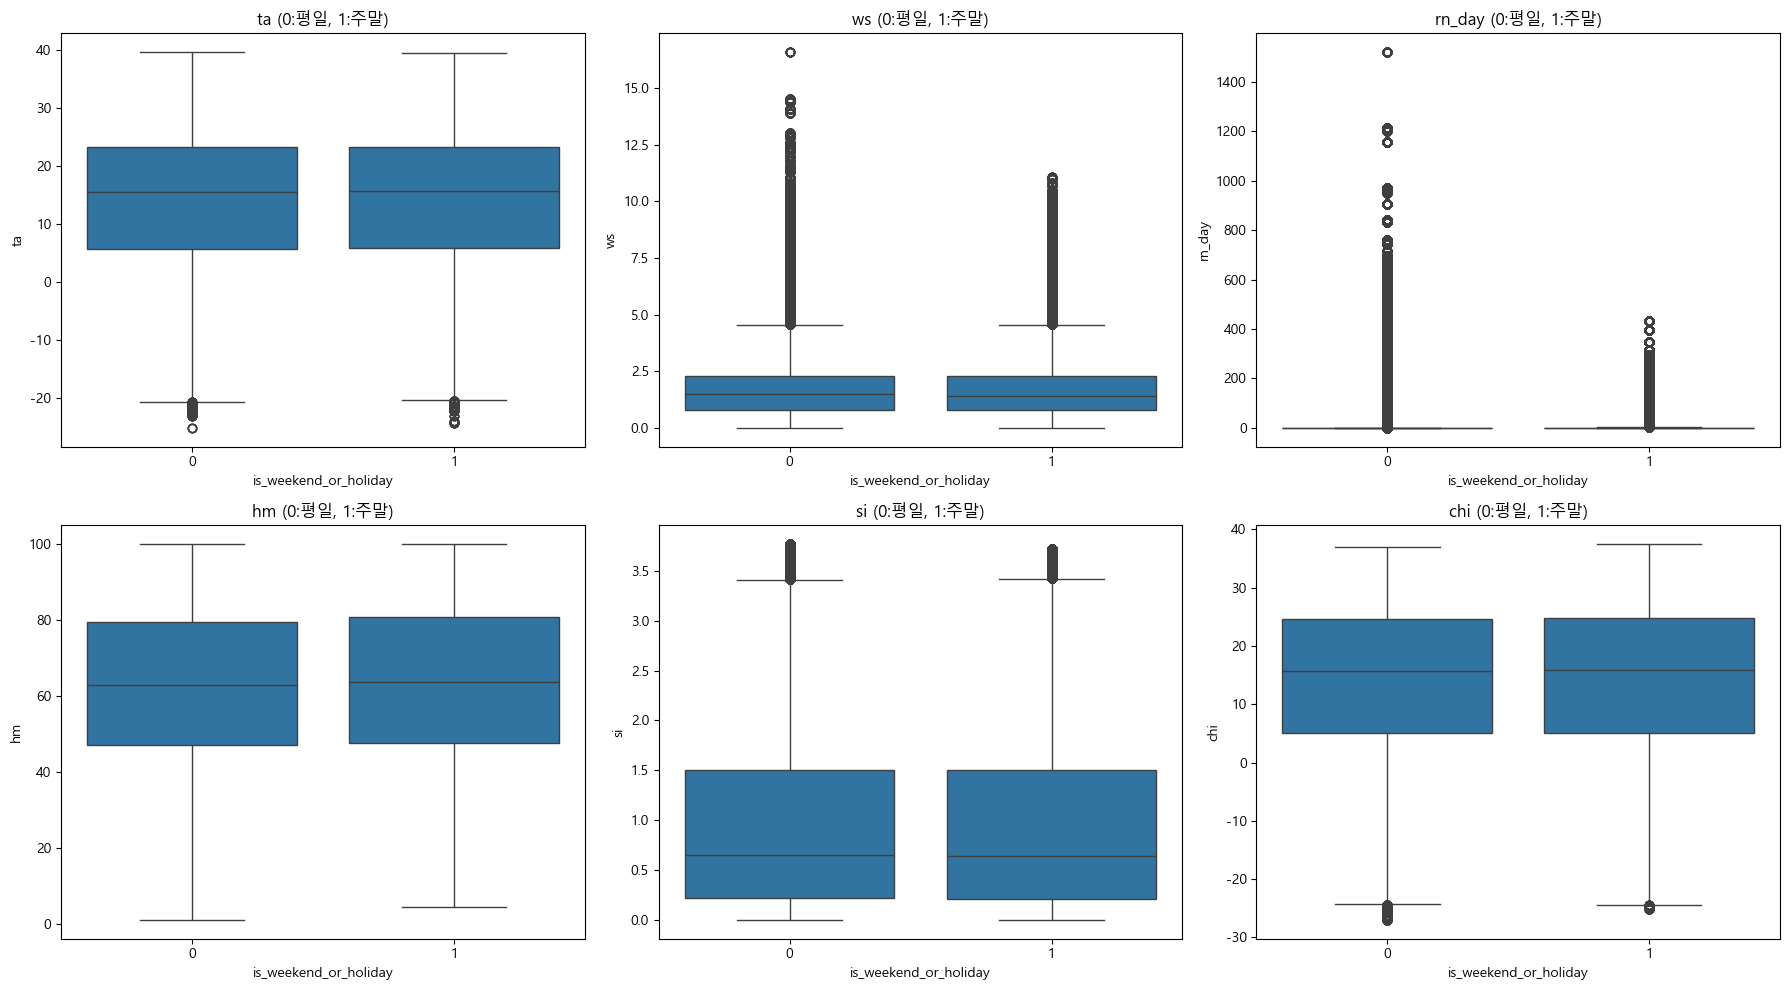

In [35]:
weather_cols = ['ta', 'ws', 'rn_day', 'hm', 'si', 'chi']

plt.figure(figsize=(18, 10))
for i, col in enumerate(weather_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, x='is_weekend_or_holiday', y=col)
    plt.title(f"{col} (0:평일, 1:주말)")
plt.tight_layout()
plt.show()


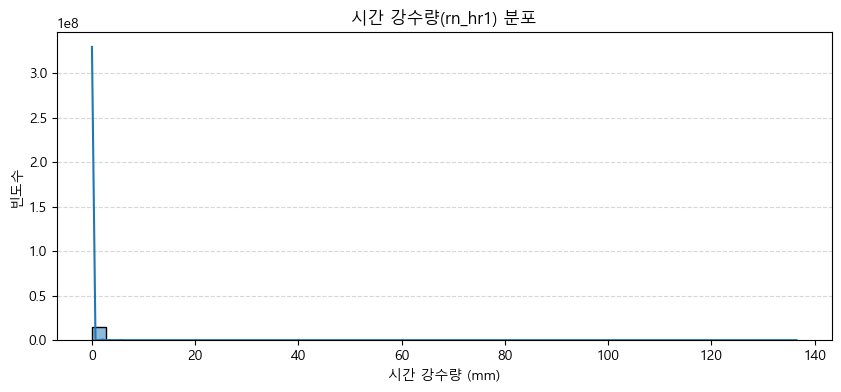

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.histplot(df['rn_hr1'], bins=50, kde=True)
plt.title('시간 강수량(rn_hr1) 분포')
plt.xlabel('시간 강수량 (mm)')
plt.ylabel('빈도수')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


In [37]:
df['rn_hr1'].describe()

count    1.558983e+07
mean     1.671783e-01
std      1.329990e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.365000e+02
Name: rn_hr1, dtype: float64

In [38]:
df['rn_hr1'].max()

136.5

---

- 모델링을 돌린다면 ? 
    - 혼잡도를 그대로 숫자값(연속형)으로 예측하는 것
    - 구간을 나눠서 범주형(분류)으로 예측하는 것

- 각각 최적의 상황과 권장 방식

| 상황                           | 권장 방식 | 이유                   |
| ---------------------------- | ----- | -------------------- |
| 혼잡도가 세밀한 수치로 필요한 경우          | 회귀    | 예: 최적 스케줄링 알고리즘에 사용  |
| 사용자 알림용 등 **해석 용이성**이 중요한 경우 | 분류    | 예: “지금 혼잡도가 매우 높습니다” |
| 값의 분포가 불균형하거나 노이즈가 많은 경우     | 분류    | 이상치 영향 완화 가능         |

- 정리 
    - ✔️ 비즈니스 목적이 “알기 쉬운 혼잡 등급 제공”이라면 → 분류가 좋고
    - ✔️ 정밀한 수치가 필요한 최적화나 시뮬레이션이 목적이라면 → 회귀가 좋습니다

- 회귀와 분류는 목적이 다르고, 출력값도 다르며, 평가 방식도 완전히 다르기 때문에 각각 따로 검증을 해야한다.

| 항목    | 회귀 모델         | 분류 모델                    |
| ----- | ------------- | ------------------------ |
| 목표값   | 수치 (ex. 37.2) | 범주 (ex. Low/Medium/High) |
| 대표 지표 | RMSE, R², MAE | Accuracy, F1-score, AUC  |
| 해석    | 예측값 자체가 의미    | 예측 클래스의 맞춤 여부            |
| 검증 방식 | 수치 기반 오차 측정   | 맞춘/못 맞춘 비율 측정            |


- RMSE에 대한 설명이 안내서에 있는 거로 보아 회귀 모델을 사용 하라는 것이 주 목표인 것 같다. 


- 모델링 할 때 필요한 순서 ! 
    - 필요한 변수 선택 및 가공을 해야 할 필요성이 있다.(변수 선택을 어떤 방법으로 ??)
        - 변수 선택을 어떤 방법으로 ??
        - 상업지구인지 아닌지 나눌 필요성 있나 ? 

- 모델링을 한다면 ? 
    - 입력 (예시) : 역, 기온, 체감온도, 불쾌지수, 시간, 노선
    - 출력 : 혼잡도
- 필요할까 ? 
    - 변수 조합별 혼잡도 차이 분석
        - 특정 노선 + 특정 시간데 + 상업 지구 방향 -> 혼잡도가 높은가 ? 
        - 불쾌지수가 높을수록 혼잡도가 높아지는가 ? 

In [39]:
df

,line,station_number,station_name,direction,stn,ta,wd,ws,rn_hr1,hm,...,is_weekend_or_holiday,month,calculated_chi,chi_rounded,calculated_chi_rounded,is_same,chi_diff,discomfort_index,di_level,rn_day
0,1,150,서울역,상선,419,-9.6,291.1,3.3,0.0,52.477,...,1,1,-11.217324,-12.6,-11.2,False,-1.382676,26.032375,쾌적,0.0
1,1,150,서울역,상선,419,-9.3,124.7,2.4,0.0,70.292,...,1,1,-9.981439,-10.3,-10.0,False,-0.318561,22.243460,쾌적,0.0
2,1,150,서울역,상선,419,-9.3,126.2,1.7,0.0,55.452,...,1,1,-9.051622,-10.1,-9.1,False,-1.048378,25.731898,쾌적,0.0
3,1,150,서울역,상선,419,-9.1,145.7,1.3,0.0,51.202,...,1,1,-8.155941,-9.7,-8.2,False,-1.544059,26.994326,쾌적,0.0
4,1,150,서울역,상선,419,-8.5,194.2,0.6,0.0,62.856,...,1,1,-5.746168,-9.7,-5.7,False,-3.953832,25.137260,쾌적,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15589828,8,2828,남위례,하선,572,0.6,0.0,0.0,0.0,83.100,...,1,12,13.492900,0.0,13.5,False,-13.492900,35.396314,쾌적,12.0
15589829,8,2828,남위례,하선,572,0.0,354.7,0.0,0.0,84.700,...,1,12,13.120000,-0.6,13.1,False,-13.720000,34.187900,쾌적,12.0
15589830,8,2828,남위례,하선,572,-0.6,0.0,0.0,0.0,85.100,...,1,12,12.747100,-1.1,12.7,False,-13.847100,33.139206,쾌적,12.0
15589831,8,2828,남위례,하선,572,-0.8,0.0,0.0,0.0,85.600,...,1,12,12.622800,-1.3,12.6,False,-13.922800,32.733248,쾌적,12.0


In [40]:
df['congestion']

0            0
1            1
2            2
3            3
4            3
            ..
15589828    18
15589829    17
15589830    21
15589831    18
15589832    22
Name: congestion, Length: 15589833, dtype: int64

---

## 출퇴근시간 EDA

In [55]:
df['year'] = pd.to_datetime(df['date_dt']).dt.year
df['month'] = pd.to_datetime(df['date_dt']).dt.month
grouped_all = df.groupby(['year', 'month', 'hour'])[
    ['congestion', 'ta', 'hm', 'si', 'rn_hr1']
].mean().reset_index()

In [56]:
def assign_commute_time(hour):
    if 7 <= hour <= 9:
        return '출근'
    elif 17 <= hour <= 19:
        return '퇴근'
    else:
        return '기타'

df['출퇴근시간'] = df['hour'].apply(assign_commute_time)

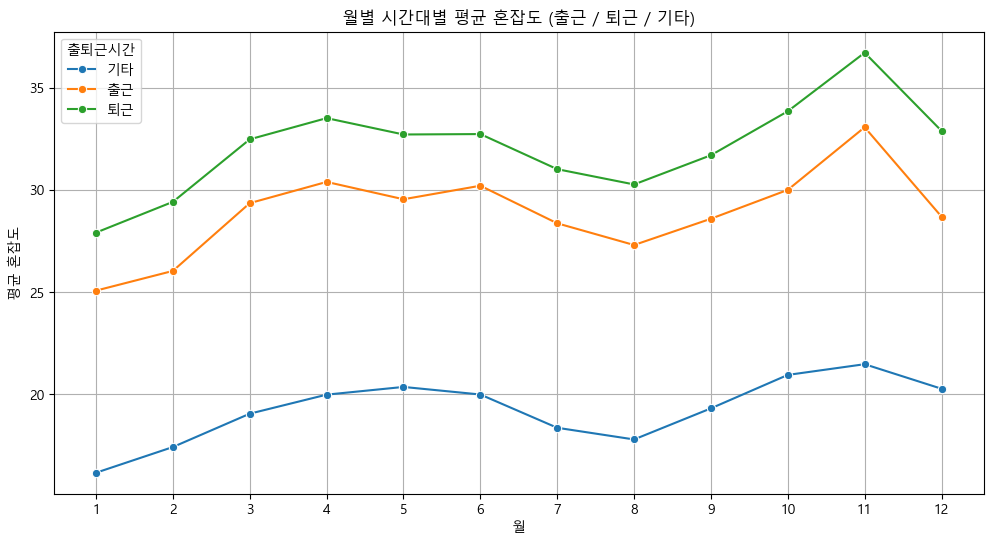

In [58]:
# 출근과 퇴근에도 혼잡도 차이가 있을까?
# 월별 + 출근or퇴근 기준 평균 혼잡도
monthly_all = df.groupby(['month', '출퇴근시간'])['congestion'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_all, x='month', y='congestion', hue='출퇴근시간', marker='o')
plt.title('월별 시간대별 평균 혼잡도 (출근 / 퇴근 / 기타)')
plt.xlabel('월')
plt.ylabel('평균 혼잡도')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

- 퇴근시간대가 가장 혼잡도가 높고 11월이 가장 혼잡도가 높은것을 확인할 수 있다.
- 혼잡도와 관련해서 비출퇴근시간이 더 상관관계가 높음 하지만 다 낮음

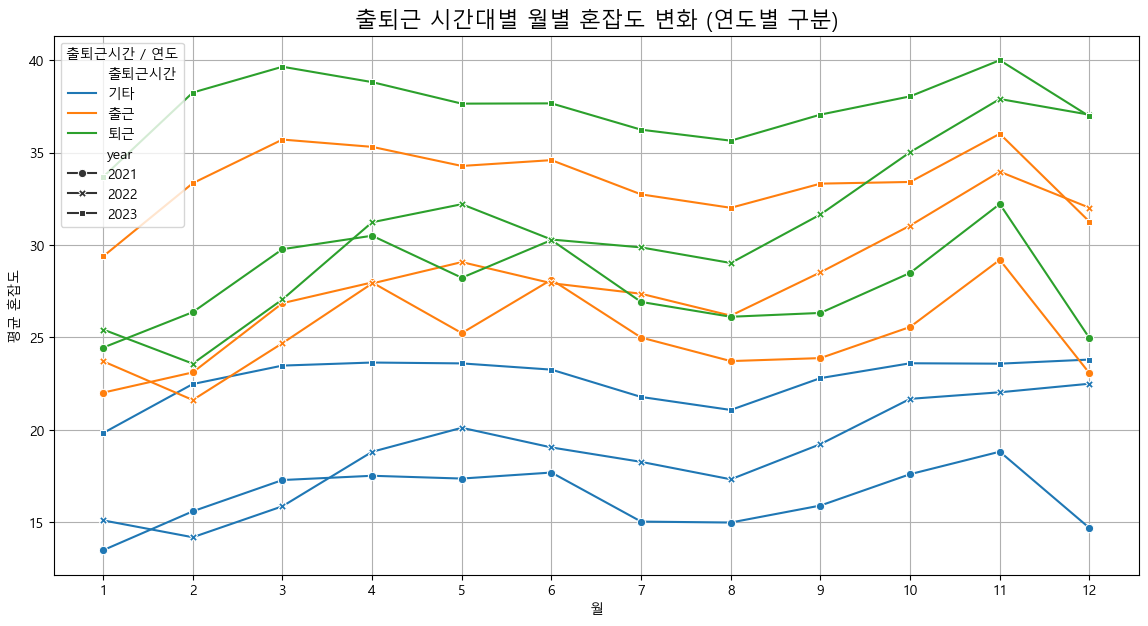

In [59]:
monthly_trend = df.groupby(['year', 'month', '출퇴근시간'])['congestion'].mean().reset_index()


plt.figure(figsize=(14, 7))
sns.lineplot(
    data=monthly_trend,
    x='month',
    y='congestion',
    hue='출퇴근시간',
    style='year',
    markers=True,
    dashes=False
)
plt.title('출퇴근 시간대별 월별 혼잡도 변화 (연도별 구분)', fontsize=16)
plt.xlabel('월')
plt.ylabel('평균 혼잡도')
plt.xticks(range(1, 13))
plt.legend(title='출퇴근시간 / 연도')
plt.grid(True)
plt.show()

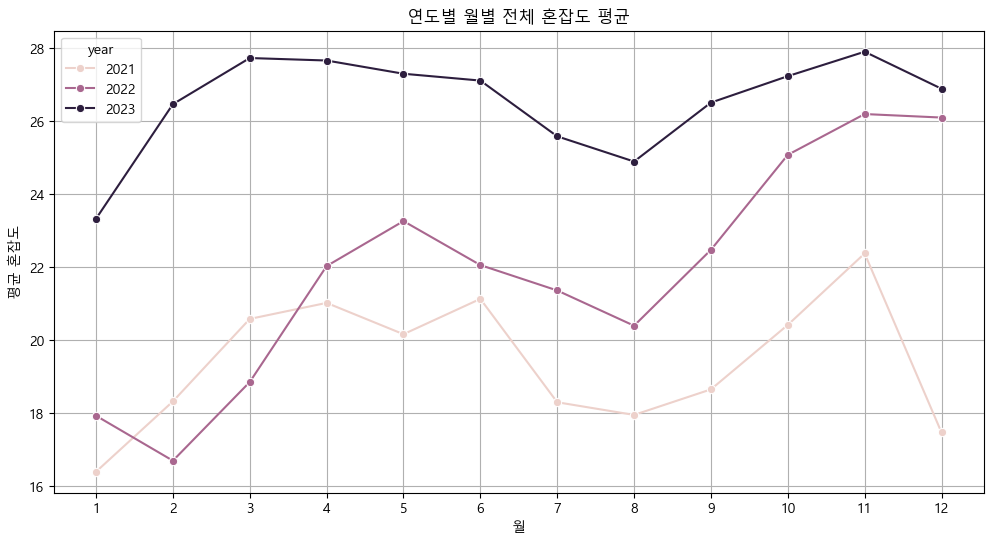

In [61]:
monthly_overall = df.groupby(['year', 'month'])['congestion'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly_overall,
    x='month',
    y='congestion',
    hue='year',
    marker='o'
)
plt.title('연도별 월별 전체 혼잡도 평균')
plt.xlabel('월')
plt.ylabel('평균 혼잡도')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


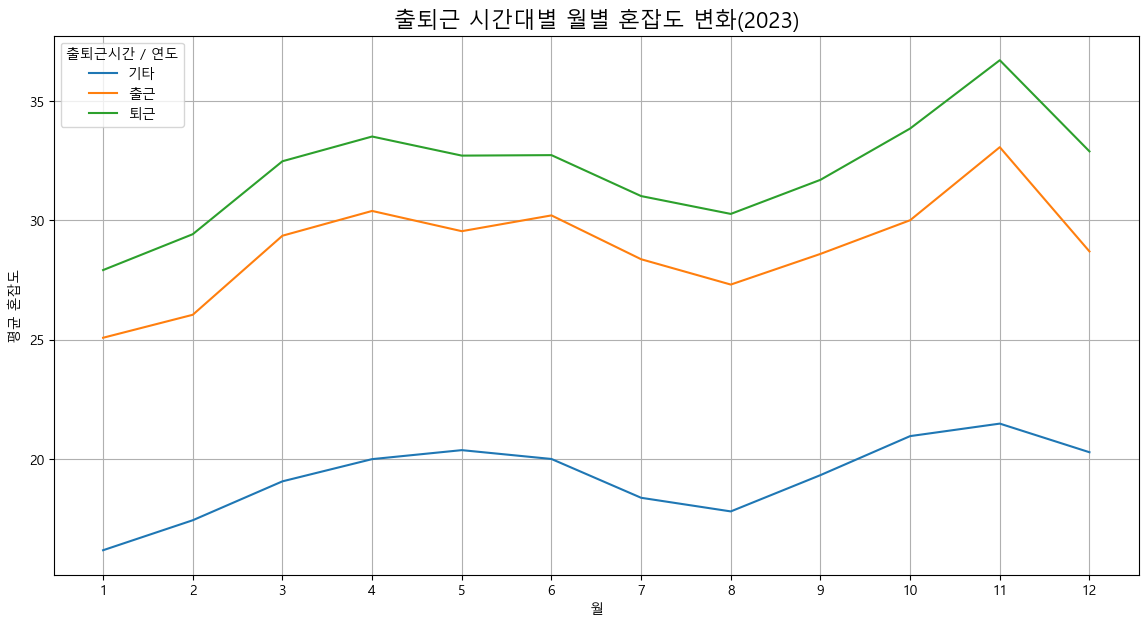

In [62]:
monthly_trend = df.groupby(['month', '출퇴근시간'])['congestion'].mean().reset_index()


plt.figure(figsize=(14, 7))
sns.lineplot(
    data=monthly_trend,
    x='month',
    y='congestion',
    hue='출퇴근시간',
    dashes=False
)
plt.title('출퇴근 시간대별 월별 혼잡도 변화(2023)', fontsize=16)
plt.xlabel('월')
plt.ylabel('평균 혼잡도')
plt.xticks(range(1, 13))
plt.legend(title='출퇴근시간 / 연도')
plt.grid(True)
plt.show()

In [66]:
df.columns

Index(['line', 'station_number', 'station_name', 'direction', 'stn', 'ta',
       'wd', 'ws', 'rn_hr1', 'hm', 'si', 'chi', 'congestion', 'hour',
       'date_dt', 'is_weekend_or_holiday', 'month', 'calculated_chi',
       'chi_rounded', 'calculated_chi_rounded', 'is_same', 'chi_diff',
       'discomfort_index', 'di_level', 'rn_day', '출퇴근시간', 'year'],
      dtype='object')

<Figure size 1200x600 with 0 Axes>

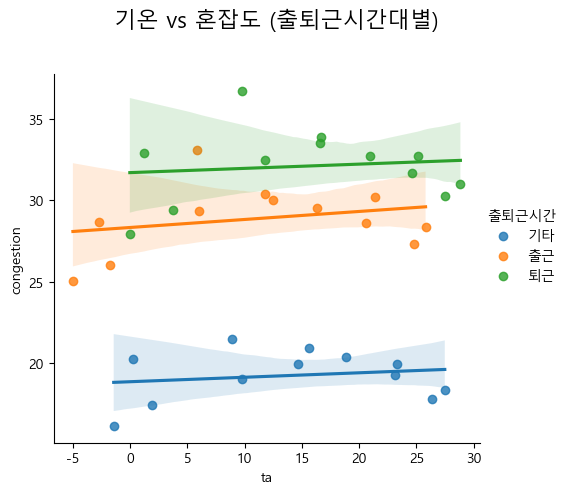

In [67]:
weather_grouped = df.groupby(['month', '출퇴근시간']).agg({
    'congestion': 'mean',
    'ta': 'mean',          # 실제 기온
    'chi': 'mean',      # 체감온도
    'rn_day': 'mean',      # 일 누적 강수량
}).reset_index()

plt.figure(figsize=(12, 6))
sns.lmplot(
    data=weather_grouped,
    x='ta', y='congestion',
    hue='출퇴근시간',
    height=5, aspect=1
)
plt.subplots_adjust(top=0.85)
plt.suptitle('기온 vs 혼잡도 (출퇴근시간대별)', fontsize=16)
plt.show()

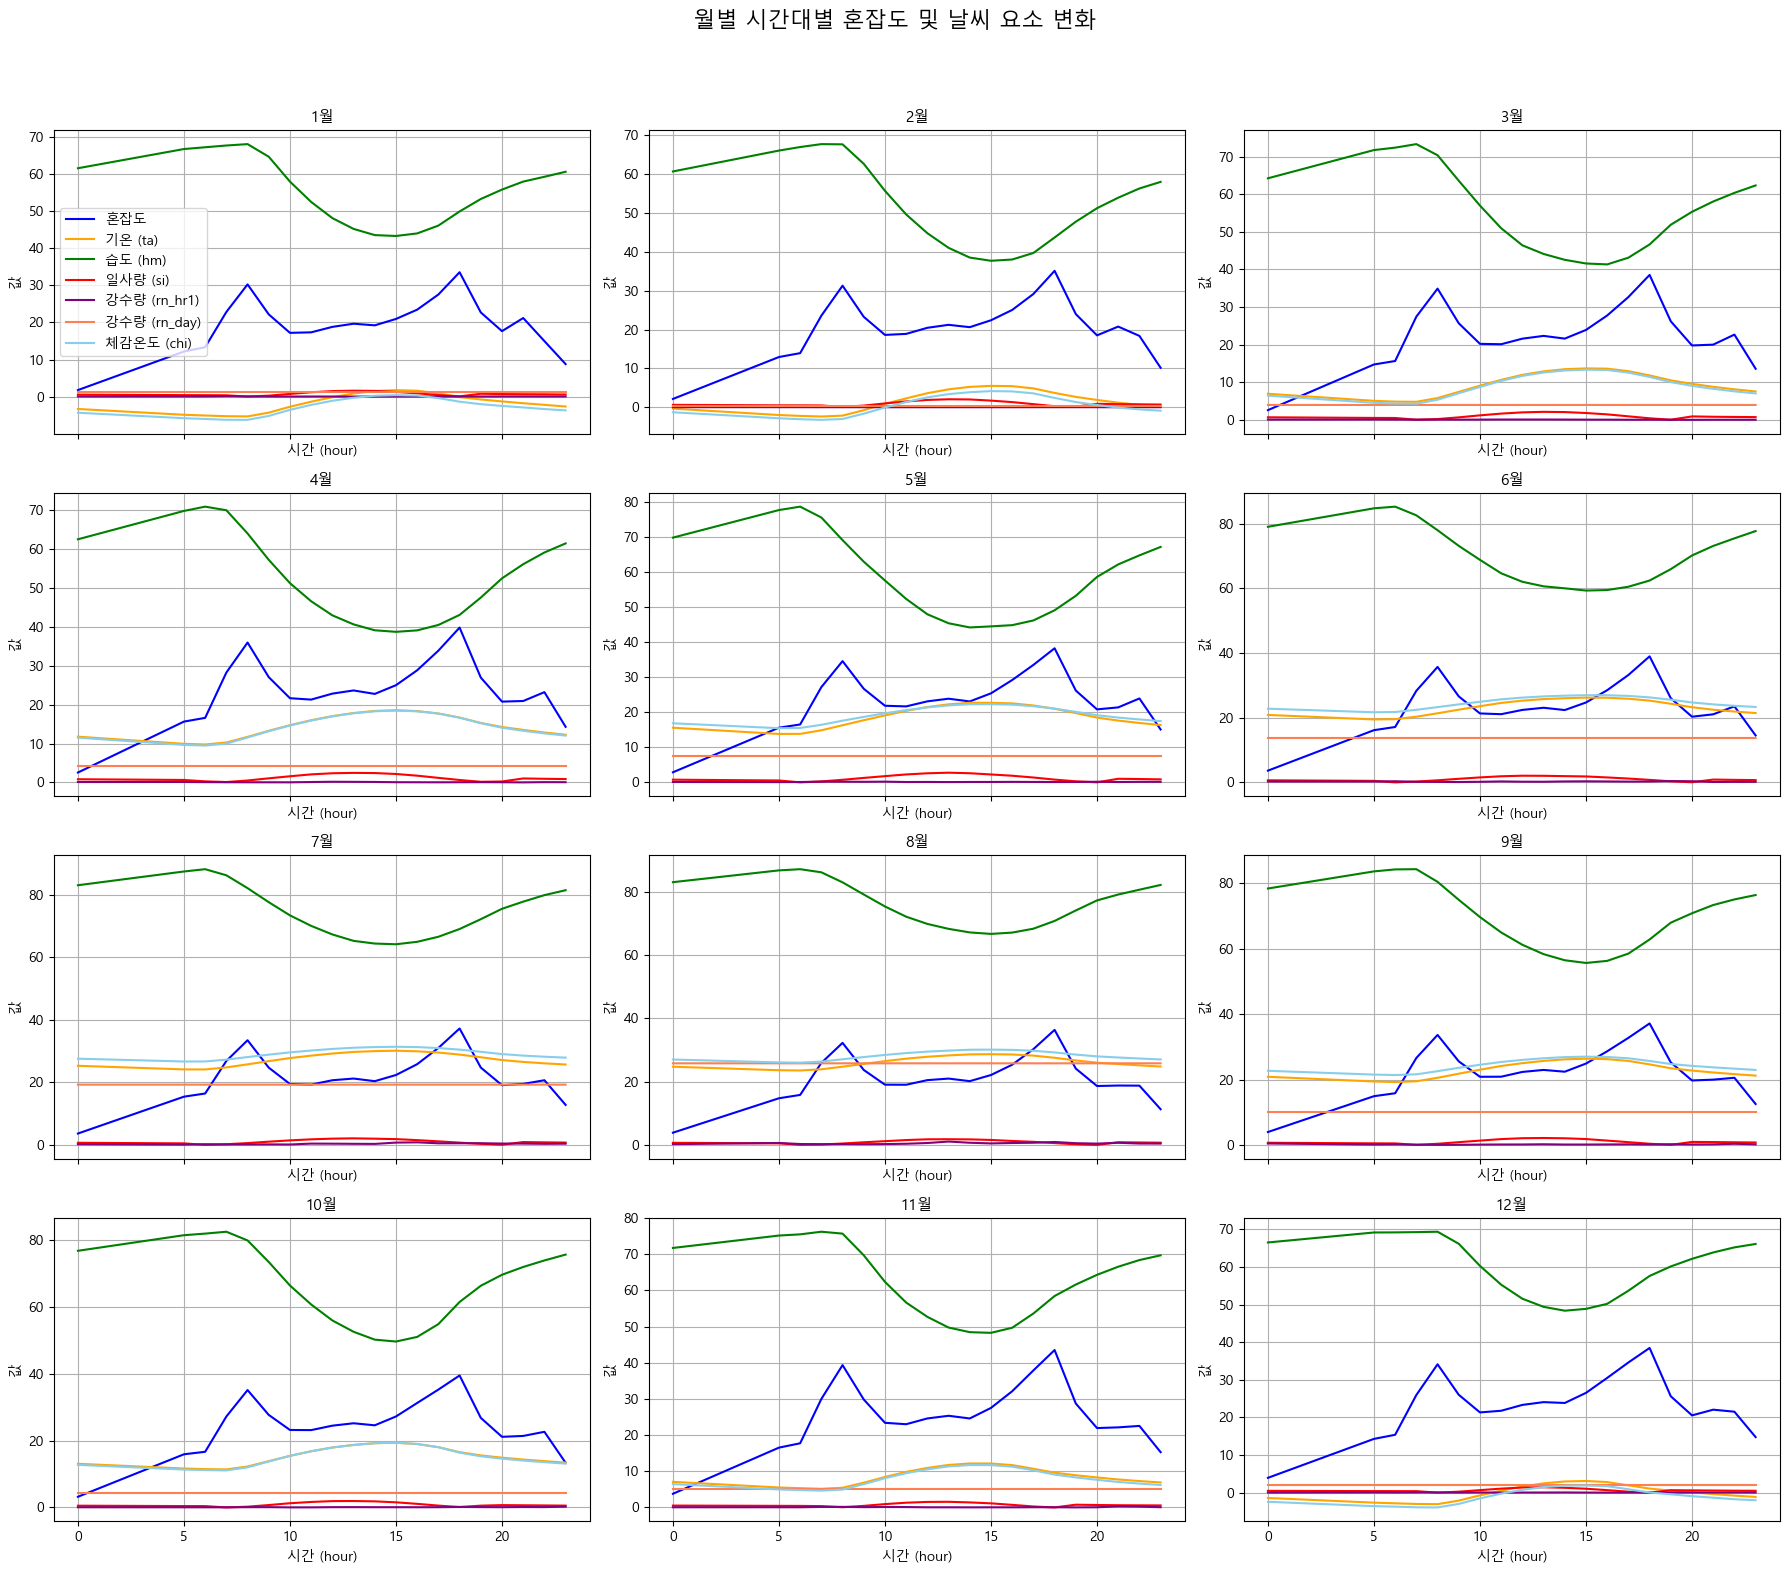

In [70]:
grouped = df.groupby(['month', 'hour'])[
    ['congestion', 'ta', 'hm', 'si', 'rn_hr1', 'rn_day', 'chi']
].mean().reset_index()

# unique한 (year, month) 조합 정렬
time_keys = sorted(grouped['month'].drop_duplicates().values.tolist())

# subplot 그리드 사이즈 설정 (예: 4행 x 3열)
ncols = 3
nrows = (len(time_keys) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, nrows * 4), sharex=True, sharey=False)
axes = axes.flatten()

# 각 (year, month)에 대해 하나의 subplot 생성
for i, month in enumerate(time_keys):
    ax = axes[i]
    df_sub = grouped[grouped['month'] == month]

    ax.plot(df_sub['hour'], df_sub['congestion'], color='blue', label='혼잡도')
    ax.plot(df_sub['hour'], df_sub['ta'], color='orange', label='기온 (ta)')
    ax.plot(df_sub['hour'], df_sub['hm'], color='green', label='습도 (hm)')
    ax.plot(df_sub['hour'], df_sub['si'], color='red', label='일사량 (si)')
    ax.plot(df_sub['hour'], df_sub['rn_hr1'], color='purple', label='강수량 (rn_hr1)')
    ax.plot(df_sub['hour'], df_sub['rn_day'], color='coral', label='강수량 (rn_day)')
    ax.plot(df_sub['hour'], df_sub['chi'], color='skyblue', label='체감온도 (chi)')

    ax.set_title(f'{month}월', fontsize=11)
    ax.set_xlabel('시간 (hour)')
    ax.set_ylabel('값')
    ax.grid(True)
    if i == 0:
        ax.legend()

# 남는 subplot은 제거
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("월별 시간대별 혼잡도 및 날씨 요소 변화", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

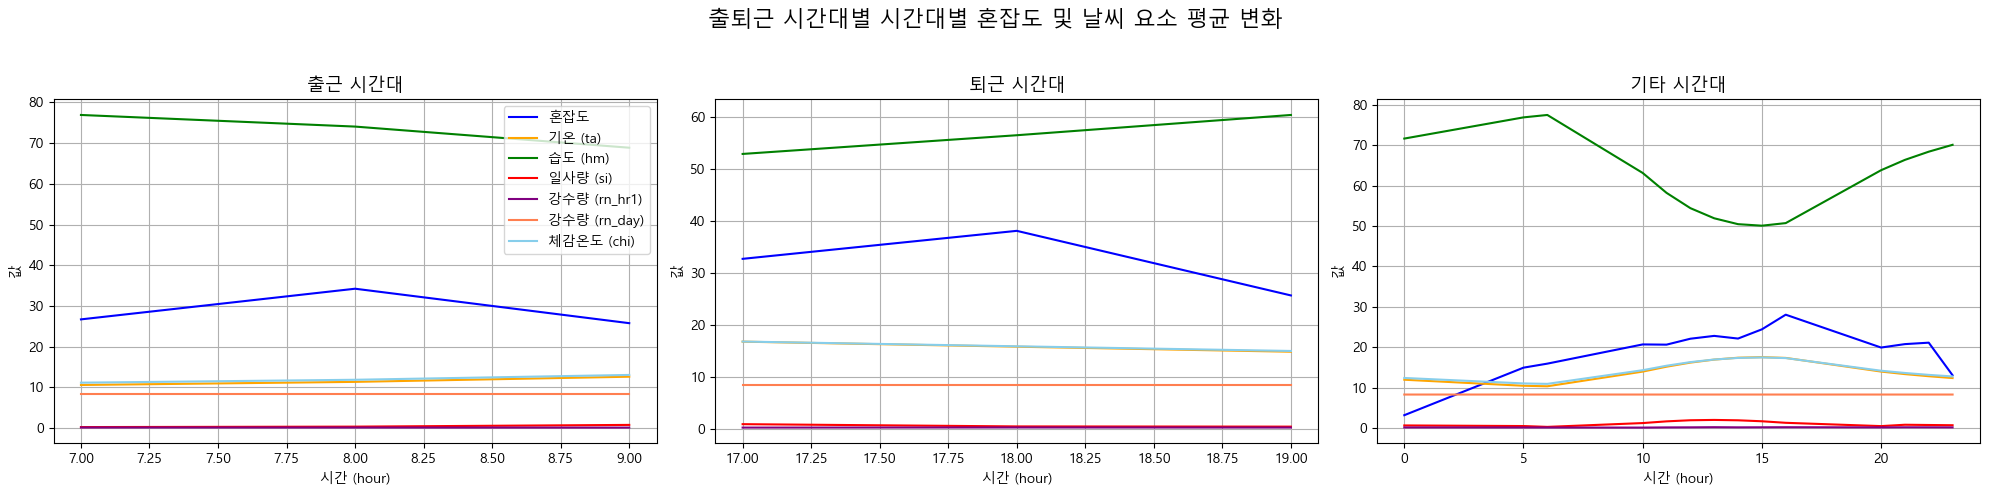

In [71]:
# 1. 출퇴근시간별로 groupby
grouped_by_commute = df.groupby(['출퇴근시간', 'hour'])[
    ['congestion', 'ta', 'hm', 'si', 'rn_hr1', 'rn_day', 'chi']
].mean().reset_index()

# 2. subplot 준비 (출근, 퇴근, 기타 총 3개)
commute_categories = ['출근', '퇴근', '기타']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5), sharey=False)

# 3. 카테고리별 subplot 그리기
for i, category in enumerate(commute_categories):
    ax = axes[i]
    df_sub = grouped_by_commute[grouped_by_commute['출퇴근시간'] == category]

    ax.plot(df_sub['hour'], df_sub['congestion'], label='혼잡도', color='blue')
    ax.plot(df_sub['hour'], df_sub['ta'], label='기온 (ta)', color='orange')
    ax.plot(df_sub['hour'], df_sub['hm'], label='습도 (hm)', color='green')
    ax.plot(df_sub['hour'], df_sub['si'], label='일사량 (si)', color='red')
    ax.plot(df_sub['hour'], df_sub['rn_hr1'], label='강수량 (rn_hr1)', color='purple')
    ax.plot(df_sub['hour'], df_sub['rn_day'], label='강수량 (rn_day)', color='coral')
    ax.plot(df_sub['hour'], df_sub['chi'], label='체감온도 (chi)', color='skyblue')

    ax.set_title(f'{category} 시간대', fontsize=13)
    ax.set_xlabel('시간 (hour)')
    ax.set_ylabel('값')
    ax.grid(True)
    if i == 0:
        ax.legend(loc='upper right')

# 전체 타이틀과 레이아웃 조정
plt.suptitle('출퇴근 시간대별 시간대별 혼잡도 및 날씨 요소 평균 변화', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

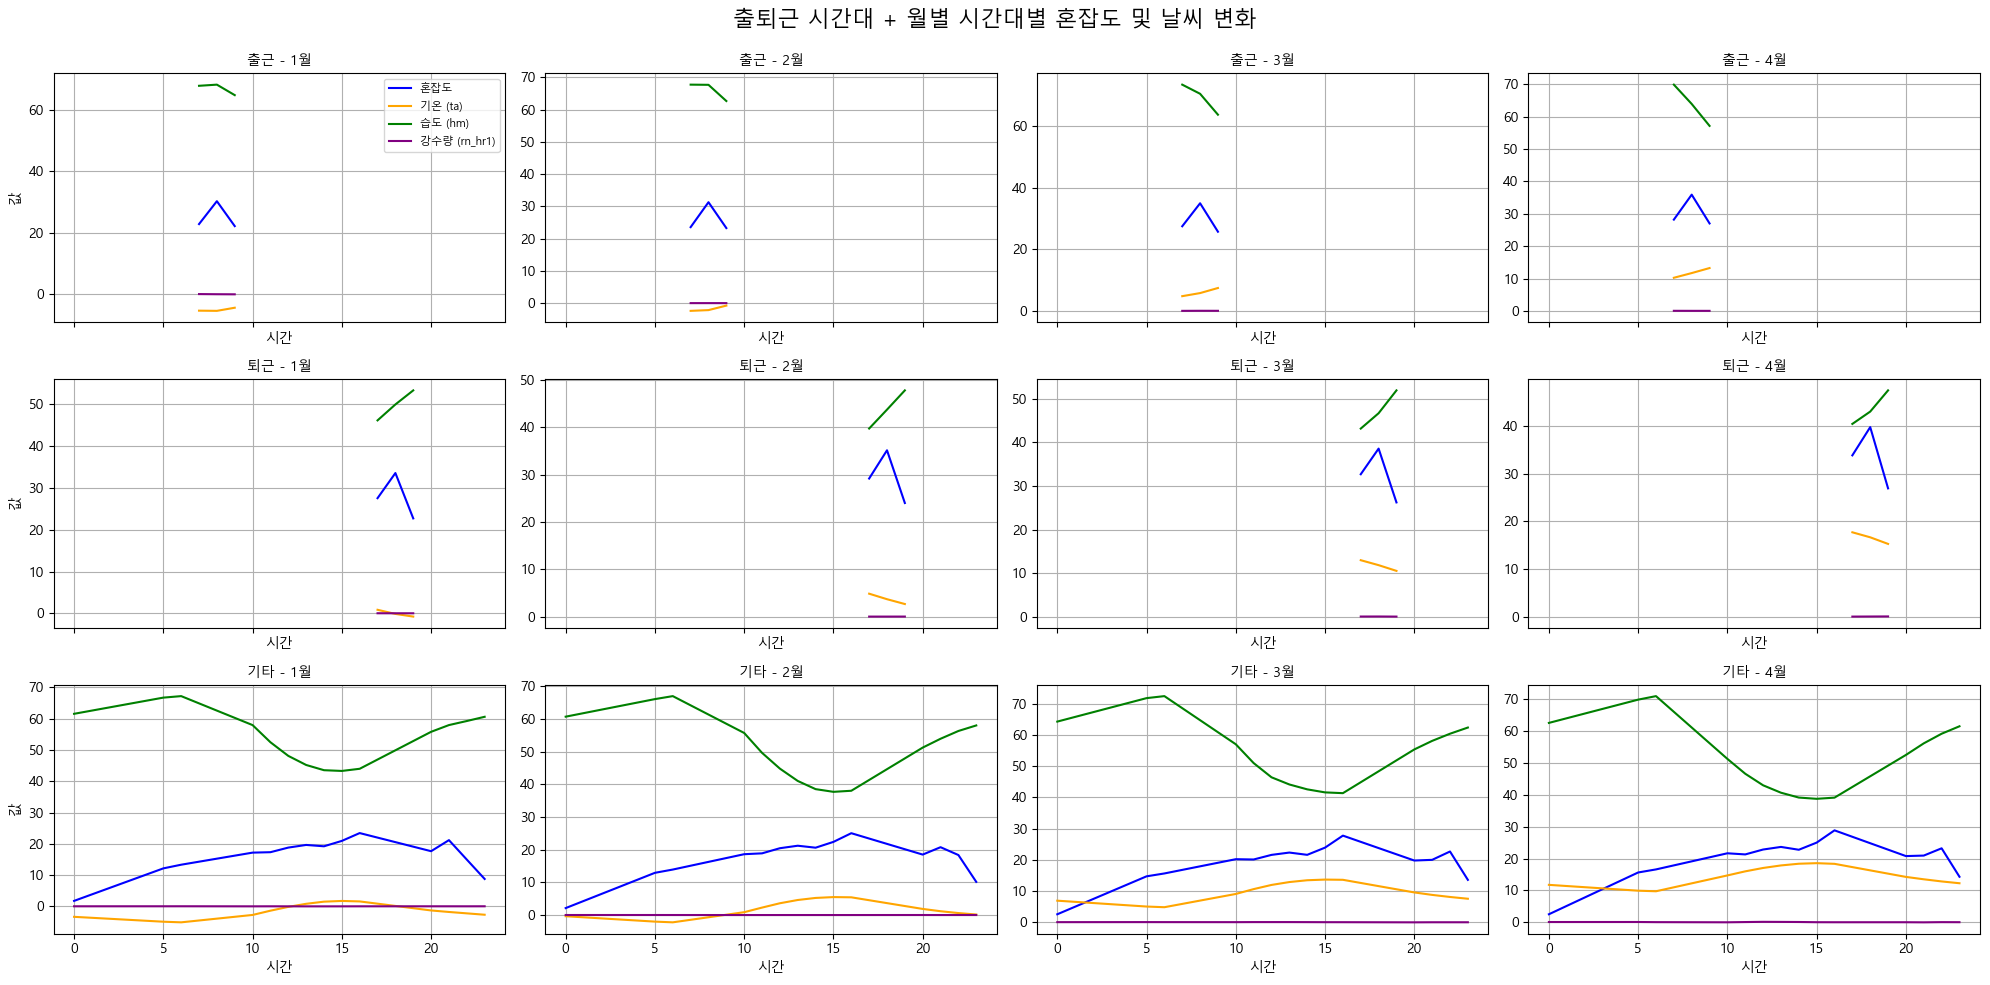

In [72]:
# 1. groupby로 평균 구하기
grouped = df.groupby(['출퇴근시간', 'month', 'hour'])[
    ['congestion', 'ta', 'hm', 'si', 'rn_hr1', 'rn_day', 'chi']
].mean().reset_index()

# 2. 카테고리와 월 리스트 정의
commute_categories = ['출근', '퇴근', '기타']
months = list(range(1, 13))

# 3. subplot 설정
nrows = 3  # 출퇴근시간 3개
ncols = 4  # 월 4개씩
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10), sharex=True, sharey=False)
axes = axes.reshape(nrows, ncols)

# 4. 반복해서 subplot 그리기
for i, commute in enumerate(commute_categories):
    for j, month in enumerate(months[:4]):  # 1~4월 먼저
        ax = axes[i, j]
        df_sub = grouped[(grouped['출퇴근시간'] == commute) & (grouped['month'] == month)]

        ax.plot(df_sub['hour'], df_sub['congestion'], label='혼잡도', color='blue')
        ax.plot(df_sub['hour'], df_sub['ta'], label='기온 (ta)', color='orange')
        ax.plot(df_sub['hour'], df_sub['hm'], label='습도 (hm)', color='green')
        ax.plot(df_sub['hour'], df_sub['rn_hr1'], label='강수량 (rn_hr1)', color='purple')

        ax.set_title(f'{commute} - {month}월', fontsize=10)
        ax.set_xlabel('시간')
        if j == 0:
            ax.set_ylabel('값')

        ax.grid(True)
        if i == 0 and j == 0:
            ax.legend(fontsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('출퇴근 시간대 + 월별 시간대별 혼잡도 및 날씨 변화', fontsize=16)
plt.show()


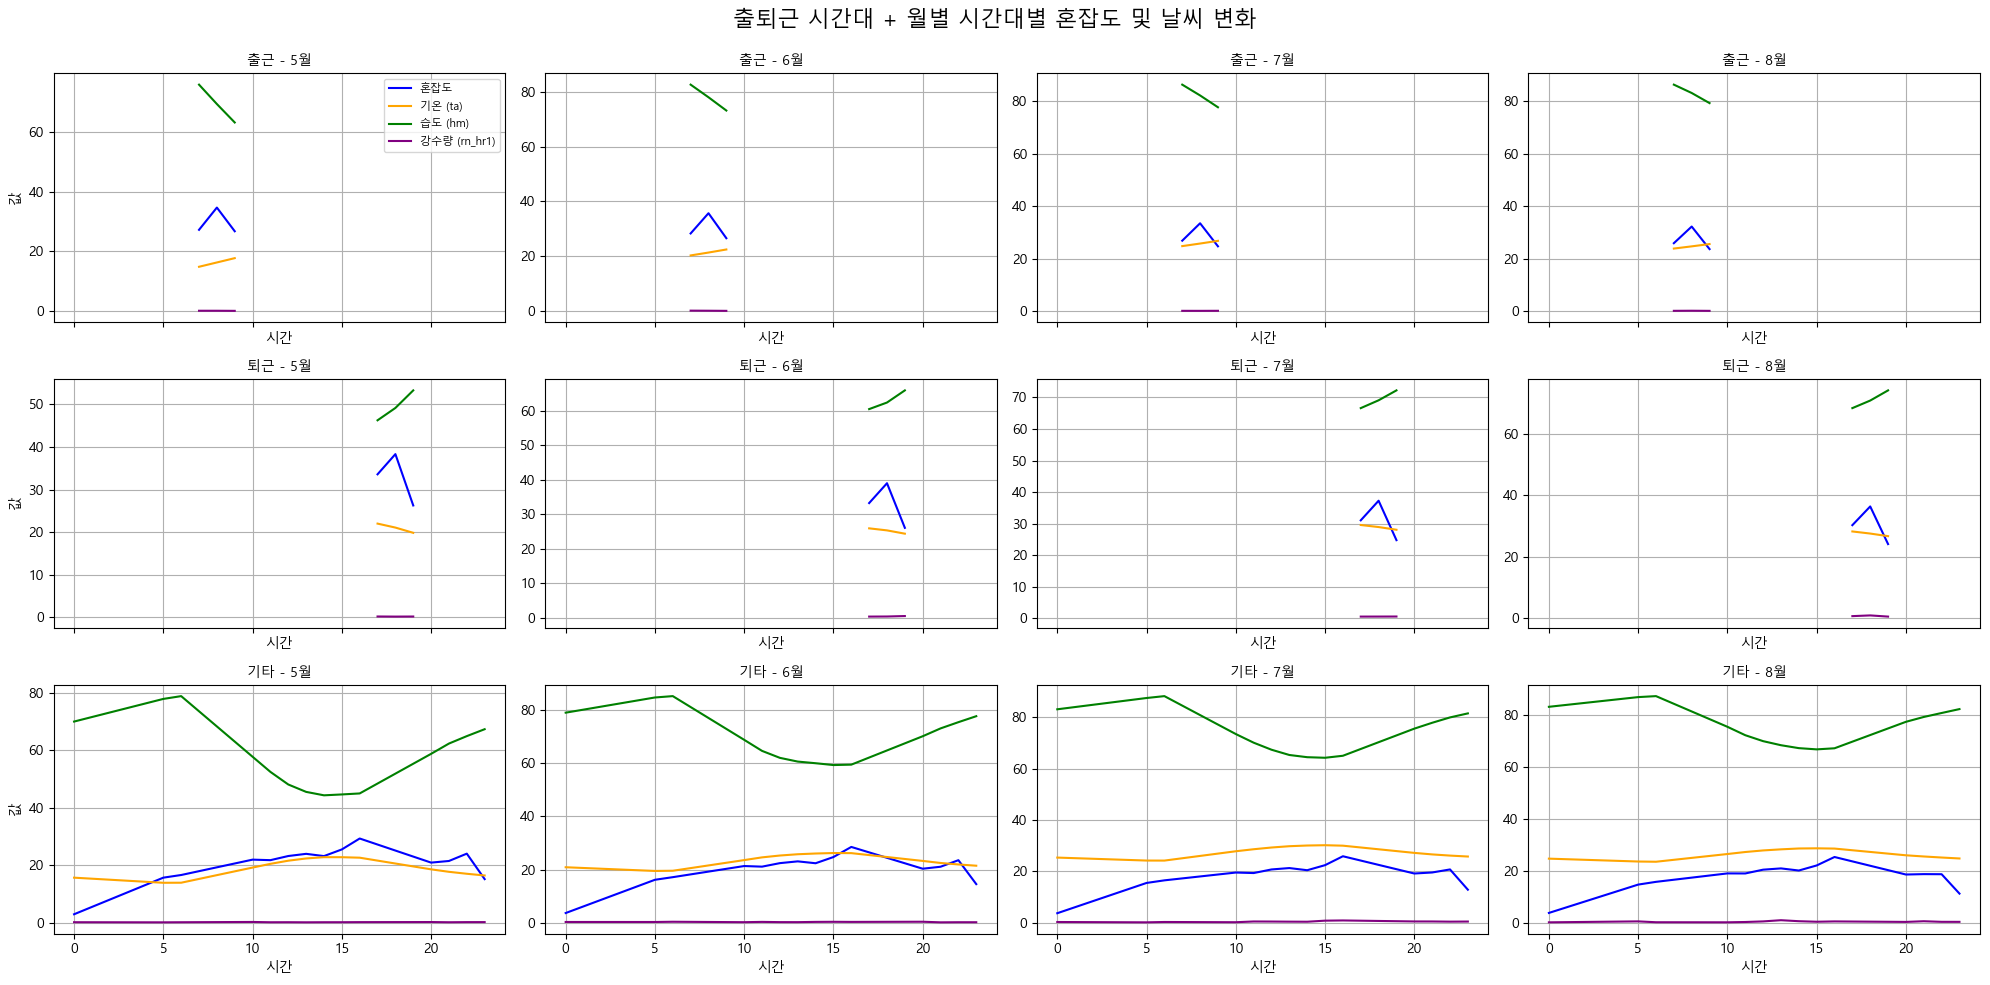

In [73]:
# 1. groupby로 평균 구하기
grouped = df.groupby(['출퇴근시간', 'month', 'hour'])[
    ['congestion', 'ta', 'hm', 'si', 'rn_hr1', 'rn_day', 'chi']
].mean().reset_index()

# 2. 카테고리와 월 리스트 정의
commute_categories = ['출근', '퇴근', '기타']
months = list(range(1, 13))

# 3. subplot 설정
nrows = 3  # 출퇴근시간 3개
ncols = 4  # 월 4개씩
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10), sharex=True, sharey=False)
axes = axes.reshape(nrows, ncols)

# 4. 반복해서 subplot 그리기
for i, commute in enumerate(commute_categories):
    for j, month in enumerate(months[4:8]):  # 5-8월
        ax = axes[i, j]
        df_sub = grouped[(grouped['출퇴근시간'] == commute) & (grouped['month'] == month)]

        ax.plot(df_sub['hour'], df_sub['congestion'], label='혼잡도', color='blue')
        ax.plot(df_sub['hour'], df_sub['ta'], label='기온 (ta)', color='orange')
        ax.plot(df_sub['hour'], df_sub['hm'], label='습도 (hm)', color='green')
        ax.plot(df_sub['hour'], df_sub['rn_hr1'], label='강수량 (rn_hr1)', color='purple')

        ax.set_title(f'{commute} - {month}월', fontsize=10)
        ax.set_xlabel('시간')
        if j == 0:
            ax.set_ylabel('값')

        ax.grid(True)
        if i == 0 and j == 0:
            ax.legend(fontsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('출퇴근 시간대 + 월별 시간대별 혼잡도 및 날씨 변화', fontsize=16)
plt.show()


In [74]:
from scipy.stats import f_oneway

# 각 그룹의 혼잡도 추출
congestion_go = df[df['출퇴근시간'] == '출근']['congestion']
congestion_off = df[df['출퇴근시간'] == '퇴근']['congestion']
congestion_else = df[df['출퇴근시간'] == '기타']['congestion']

# 일원분산분석 (ANOVA)
f_stat, p_value = f_oneway(congestion_go, congestion_off, congestion_else)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4e}")

if p_value < 0.05:
    print("✅ 출퇴근시간에 따라 혼잡도의 유의미한 차이가 있습니다.")
else:
    print("❌ 출퇴근시간에 따른 혼잡도 차이는 통계적으로 유의하지 않습니다.")

F-statistic: 619295.3779
P-value: 0.0000e+00
✅ 출퇴근시간에 따라 혼잡도의 유의미한 차이가 있습니다.


🎯 분석 개요
- 출퇴근 시간대에 따라 지하철 혼잡도(congestion)가 유의미하게 차이가 있는지를 검정하기 위해 일원분산분석(ANOVA)를 수행. 이 분석은 다음 세 그룹 간 평균 혼잡도 차이를 비교
    - 출근 시간대 (예: 07~09시)
    - 퇴근 시간대 (예: 18~20시)
    - 기타 시간대 (그 외)
📊 결과 요약
- F-statistic: 619,295.3779
- P-value: 0.0000e+00 (즉, 거의 0)
✅ 해석
- 🔍 F-statistic: 619,295.3779
    - F값이 매우 크다는 것은 세 그룹 간의 분산(평균의 차이)이 그룹 내의 분산보다 매우 크다는 것을 의미
    - 즉, 단순한 우연이나 내부 변동성으로는 설명되지 않을 정도로 출근/퇴근/기타 시간대 혼잡도 평균이 다르다는 뜻임

- 🔬 P-value: 0.0000
    - p-value가 0.05보다 훨씬 작고, 사실상 0에 수렴하므로, 귀무가설(모든 그룹의 평균이 같다)을 기각
    - 즉, 출근/퇴근/기타 시간대 간 혼잡도 평균이 유의미하게 다르다는 강력한 통계적 근거가 있음

In [75]:
from scipy.stats import ttest_ind

# 출근 vs 퇴근
t_stat, p_value = ttest_ind(congestion_go, congestion_off, equal_var=False)
print(f"[출근 vs 퇴근] P-value: {p_value:.4e}")

# 출근 vs 기타
t_stat, p_value = ttest_ind(congestion_go, congestion_else, equal_var=False)
print(f"[출근 vs 기타] P-value: {p_value:.4e}")

# 퇴근 vs 기타
t_stat, p_value = ttest_ind(congestion_off, congestion_else, equal_var=False)
print(f"[퇴근 vs 기타] P-value: {p_value:.4e}")

[출근 vs 퇴근] P-value: 0.0000e+00
[출근 vs 기타] P-value: 0.0000e+00
[퇴근 vs 기타] P-value: 0.0000e+00


## 상선 vs 하선

In [79]:
# 각 호선별 상선/하선에 따른 혼잡도 및 불쾌지수 통계량 계산
direction_analysis = df.groupby(['line', 'direction']).agg(
    mean_congestion=('congestion', 'mean'),
    median_congestion=('congestion', 'median'),
    max_congestion=('congestion', 'max'),
    mean_discomfort_index=('discomfort_index', 'mean'),
    median_discomfort_index=('discomfort_index', 'median'),
    max_discomfort_index=('discomfort_index', 'max')
).reset_index()

# 결과 출력
print("--- 각 호선별 상선/하선 혼잡도 및 불쾌지수 분석 결과 ---")
print(direction_analysis)

# 특정 호선에 대한 상세 분석 예시 (예: 7호선)
print("\n--- 7호선 상선/하선 분석 결과 ---")
print(direction_analysis[direction_analysis['line'] == 7])

--- 각 호선별 상선/하선 혼잡도 및 불쾌지수 분석 결과 ---
    line direction  mean_congestion  median_congestion  max_congestion  \
0      1        상선        19.652837               16.0             231   
1      1        하선        19.689643               16.0             230   
2      2        내선        30.999152               28.0             159   
3      2        외선        31.389910               29.0             167   
4      3        상선        21.542479               17.0             289   
5      3        하선        21.576693               17.0             242   
6      4        상선        21.817668               18.0             156   
7      4        하선        20.240102               17.0             176   
8      5        상선        22.802003               19.0             152   
9      5        하선        22.630041               20.0             146   
10     6        상선        16.171612               14.0             173   
11     6        하선        17.232353               15.0             198   
1

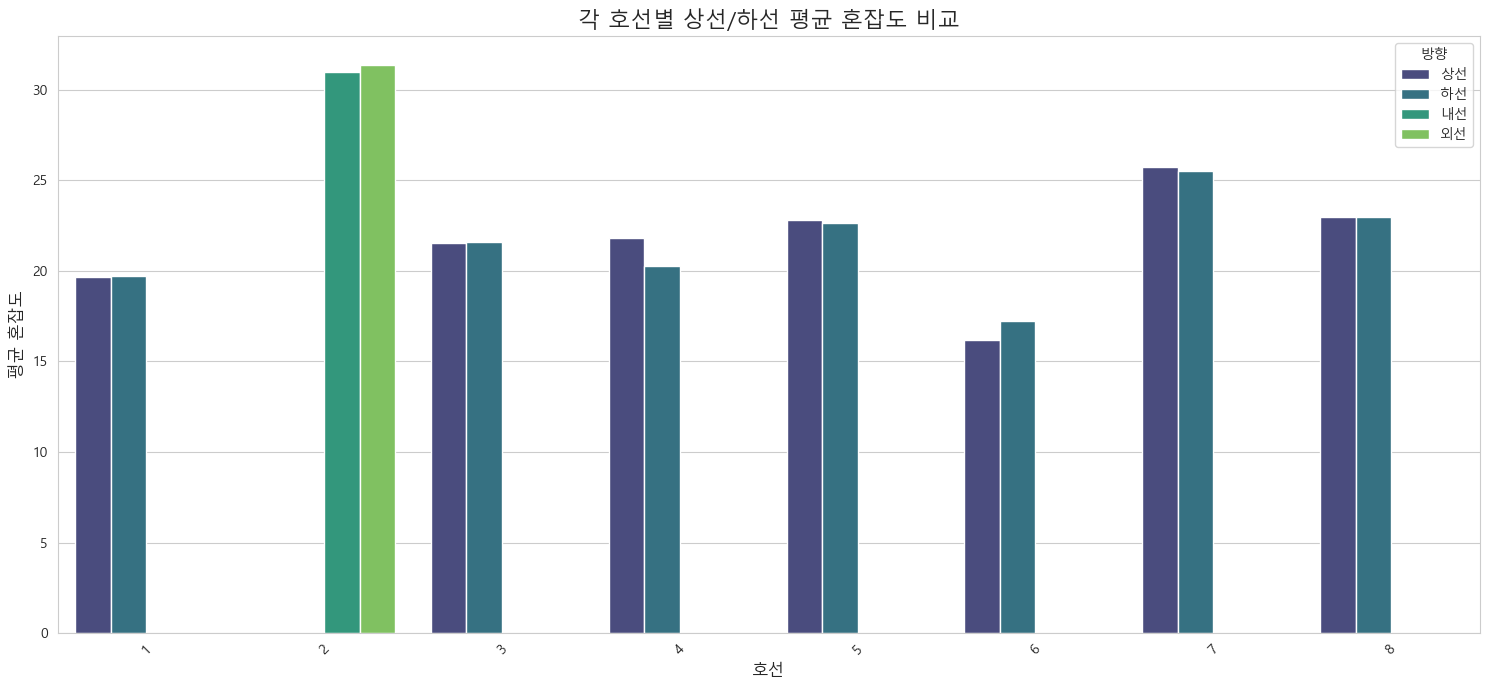

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# 이전 단계에서 생성된 direction_analysis 데이터프레임이 있다고 가정합니다.
# 만약 direction_analysis가 없다면, 아래 코드를 다시 실행하여 생성해주세요.
# direction_analysis = df_1.groupby(['line', 'direction']).agg(
#     mean_congestion=('congestion', 'mean'),
#     mean_discomfort_index=('discomfort_index', 'mean')
# ).reset_index()

# 그래프 스타일 설정
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정 (Windows 기준)
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨짐 방지

# 1. 각 호선별 상선/하선 평균 혼잡도 시각화
plt.figure(figsize=(15, 7))
sns.barplot(data=direction_analysis, x='line', y='mean_congestion', hue='direction', palette='viridis')
plt.title('각 호선별 상선/하선 평균 혼잡도 비교', fontsize=16)
plt.xlabel('호선', fontsize=12)
plt.ylabel('평균 혼잡도', fontsize=12)
plt.xticks(rotation=45) # 호선 이름이 겹치지 않도록 회전
plt.legend(title='방향')
plt.tight_layout() # 그래프 요소들이 겹치지 않도록 자동 조정
plt.show()

# 2021-2022 제거

- 2021년과 2022년도에 코로나 바이러스로 인한 거리두기 정책으로 인해 향후 모델링에 있어 불필요한 요소가 들어갈 가능성이 있기 때문에 제거를 해 준다.

In [76]:
# 연도 추출하여 필터링
df_1 = df[~df['date_dt'].dt.year.isin([2021, 2022])]

# 파생 변수 생성

In [43]:
# 시간대 조건 정의
conditions = [
    (df_1['hour'] >= 7) & (df_1['hour'] <= 9),  # 출근 시간대 (07시, 08시, 09시)
    (df_1['hour'] >= 18) & (df_1['hour'] <= 20) # 퇴근 시간대 (18시, 19시, 20시)
]

# 각 조건에 해당하는 값 정의
choices = ['출근 시간대', '퇴근 시간대']

# np.select를 사용하여 새로운 '시간대_구분' 컬럼 생성
# 조건에 해당하지 않는 경우 '기타 시간대'로 분류
df_1['시간대_구분'] = np.select(conditions, choices, default='기타 시간대')

# 결과 확인 (선택 사항)
print(df_1[['hour', '시간대_구분']].head())
print(df_1['시간대_구분'].value_counts())

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21316\2817711629.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['시간대_구분'] = np.select(conditions, choices, default='기타 시간대')


          hour  시간대_구분
10331755     0  기타 시간대
10331756     5  기타 시간대
10331757     6  기타 시간대
10331758     7  출근 시간대
10331759     8  출근 시간대
시간대_구분
기타 시간대    3680655
출근 시간대     788712
퇴근 시간대     788711
Name: count, dtype: int64


In [44]:
import pandas as pd
import numpy as np
# --- 'is_high_discomfort' 플래그 생성 (상호작용 변수 생성의 전제 조건) ---
# 'di_level'이 '불쾌' 또는 '매우 불쾌'인 경우를 높은 불쾌지수로 정의
df_1['is_high_discomfort'] = df_1['di_level'].isin(['불쾌', '매우 불쾌']).astype(int)
# --- 'is_high_discomfort' 플래그 생성 끝 ---

print("--- 상호작용 변수 생성 전 df_1의 일부 (기존 컬럼 확인) ---")
print(df_1[['hour', 'di_level', 'discomfort_index', 'is_weekend_or_holiday', '시간대_구분', 'is_high_discomfort']].head())
print("\n")

### 2. 상호작용 변수 생성 (기존 '시간대_구분' 컬럼 기준으로)

# 2.1. '시간대_구분'에 대한 더미 변수 생성
# 각 시간대 카테고리('출근 시간대', '퇴근 시간대', '기타 시간대')에 대한 이진 컬럼을 생성합니다.
# drop_first=False를 사용하여 모든 카테고리에 대한 더미 변수를 생성합니다.
time_category_dummies = pd.get_dummies(df_1['시간대_구분'], prefix='시간대', dtype=int)
df_1 = pd.concat([df_1, time_category_dummies], axis=1)

# 2.2. 불쾌지수와 각 시간대_구분 조합 (연속형 상호작용)
# 각 시간대 더미 변수와 discomfort_index를 곱합니다.
df_1['discomfort_index_x_출근시간대'] = df_1['discomfort_index'] * df_1['시간대_출근 시간대']
df_1['discomfort_index_x_퇴근시간대'] = df_1['discomfort_index'] * df_1['시간대_퇴근 시간대']
df_1['discomfort_index_x_기타시간대'] = df_1['discomfort_index'] * df_1['시간대_기타 시간대']

# 2.3. 높은 불쾌지수와 각 시간대_구분 조합 (이진형 상호작용)
# 각 시간대 더미 변수와 is_high_discomfort를 곱합니다.
df_1['is_high_di_x_출근시간대'] = df_1['is_high_discomfort'] * df_1['시간대_출근 시간대']
df_1['is_high_di_x_퇴근시간대'] = df_1['is_high_discomfort'] * df_1['시간대_퇴근 시간대']
df_1['is_high_di_x_기타시간대'] = df_1['is_high_discomfort'] * df_1['시간대_기타 시간대']

# 2.4. 불쾌지수와 휴일 여부 조합 (이전과 동일하게 유지)
# 휴일에 불쾌지수가 높을수록 값이 커짐
df_1['discomfort_index_x_is_weekend_or_holiday'] = df_1['discomfort_index'] * df_1['is_weekend_or_holiday']

# 2.5. 높은 불쾌지수와 휴일 여부 조합 (이전과 동일하게 유지)
# 불쾌지수가 높고 휴일인 경우 1, 아니면 0
df_1['is_high_di_weekend_or_holiday'] = (df_1['is_high_discomfort'] & df_1['is_weekend_or_holiday']).astype(int)


print("\n--- 상호작용 변수 생성 후 df_1의 일부 ---")
print(df_1[[
    'hour', 'di_level', 'discomfort_index', 'is_weekend_or_holiday', '시간대_구분', 'is_high_discomfort',
    '시간대_출근 시간대', '시간대_퇴근 시간대', '시간대_기타 시간대', # 생성된 더미 변수들
    'discomfort_index_x_출근시간대', 'discomfort_index_x_퇴근시간대', 'discomfort_index_x_기타시간대',
    'is_high_di_x_출근시간대', 'is_high_di_x_퇴근시간대', 'is_high_di_x_기타시간대',
    'discomfort_index_x_is_weekend_or_holiday', 'is_high_di_weekend_or_holiday'
]].head())

--- 상호작용 변수 생성 전 df_1의 일부 (기존 컬럼 확인) ---


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21316\2814744786.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['is_high_discomfort'] = df_1['di_level'].isin(['불쾌', '매우 불쾌']).astype(int)


          hour di_level  discomfort_index  is_weekend_or_holiday  시간대_구분  \
10331755     0       쾌적         37.231005                      1  기타 시간대   
10331756     5       쾌적         37.336308                      1  기타 시간대   
10331757     6       쾌적         34.742504                      1  기타 시간대   
10331758     7       쾌적         32.584688                      1  출근 시간대   
10331759     8       쾌적         31.711920                      1  출근 시간대   

          is_high_discomfort  
10331755                   0  
10331756                   0  
10331757                   0  
10331758                   0  
10331759                   0  



--- 상호작용 변수 생성 후 df_1의 일부 ---
          hour di_level  discomfort_index  is_weekend_or_holiday  시간대_구분  \
10331755     0       쾌적         37.231005                      1  기타 시간대   
10331756     5       쾌적         37.336308                      1  기타 시간대   
10331757     6       쾌적         34.742504                      1  기타 시간대   
10331758     7      

In [46]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5258078 entries, 10331755 to 15589832
Data columns (total 38 columns):
 #   Column                                    Dtype         
---  ------                                    -----         
 0   line                                      int64         
 1   station_number                            int64         
 2   station_name                              object        
 3   direction                                 object        
 4   stn                                       int64         
 5   ta                                        float64       
 6   wd                                        float64       
 7   ws                                        float64       
 8   rn_hr1                                    float64       
 9   hm                                        float64       
 10  si                                        float64       
 11  chi                                       float64       
 12  congestion 

# 상관 분석을 통한 피처 선택

| 분석 목적                          | 사용할 분석 방법                                        | 설명                       |
| ------------------------------- | ------------------------------------------------ | ------------------------ |
| **혼잡도와 어떤 변수들이 관련 있는지 확인하고 싶다** | `Pearson` 또는 `Spearman` 상관계수                     | 선형/비선형 **상관 관계만** 판단     |
| **혼잡도에 영향을 주는 요인을 해석하고 싶다**     | `Poisson 회귀`                                     | 통계적 **유의성 + 인과 해석** 가능   |
| **혼잡도를 예측하고 싶다 (정확하게 예측값 뽑기)**  | 💡 머신러닝 모델 (예: Random Forest, XGBoost, LightGBM) | 예측 정확도에 집중, **설명력은 떨어짐** |


In [44]:
# 필요한 수치형 변수들만 추려서 확인
numerical_cols = ['ta', 'hm', 'ws', 'rn_day', 'rn_hr1', 'si', 'chi', 'discomfort_index', 'congestion']
df_corr = df_1[numerical_cols]

# 상관계수 계산
pearson_corr = df_corr.corr(method='pearson')
spearman_corr = df_corr.corr(method='spearman')


c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


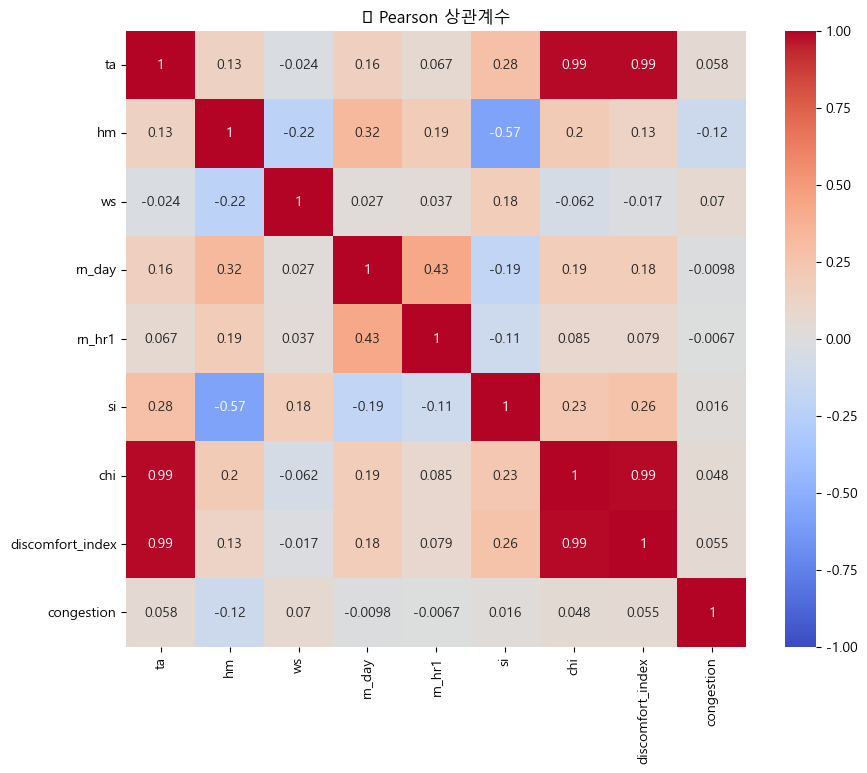

c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


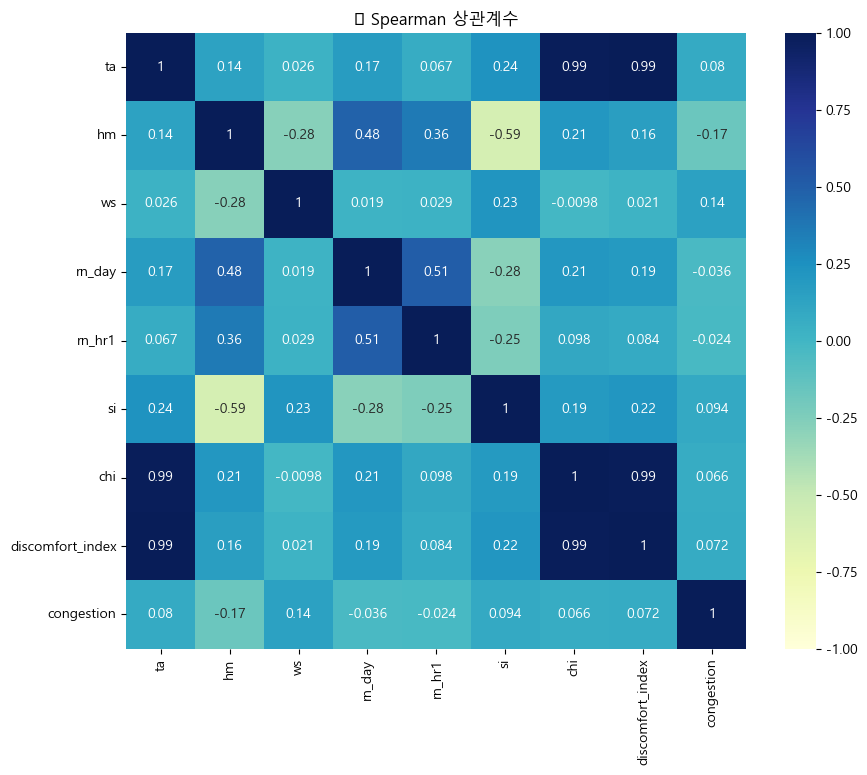

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pearson 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("📊 Pearson 상관계수")
plt.show()

# Spearman 히트맵 (선택)
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.title("📊 Spearman 상관계수")
plt.show()

- 상관 분석 요약(pearson, spearman 기준 혼잡도와의 관계)

| 변수                            | 피어슨 상관계수 | 스피어만 상관계수 | 요약 해석                                                         |
| ----------------------------- | -------- | --------- | ------------------------------------------------------------- |
| **기온 (`ta`)**                 | 0.058    | 0.080     | 약한 양의 상관. 기온이 높을수록 혼잡도가 소폭 증가하는 경향이 있으나, 통계적으로 강하다고 보긴 어려움.   |
| **습도 (`hm`)**                 | -0.12    | -0.17     | **음의 상관 관계가 가장 뚜렷함.** 습도가 높을수록 혼잡도가 낮아지는 경향이 비교적 분명함.         |
| **풍속 (`ws`)**                 | 0.07     | 0.14      | 다소 약하지만 양의 상관. 바람이 강한 날 외부 이동이 활발할 수 있다는 해석 가능성.              |
| **일사량 (`si`)**                | 0.016    | 0.094     | 거의 영향 없음. 다만, 스피어만 기준으로는 약간의 단조 증가 관계가 있을 수 있음.               |
| **체감온도 (`chi`)**              | 0.048    | 0.066     | 상관관계가 매우 약하며, 혼잡도에 영향을 미친다고 보기는 어려움.                          |
| **불쾌지수 (`Discomfort_INDEX`)** | 0.055    | 0.072     | 다소 약한 양의 상관. 불쾌지수가 높을수록 혼잡도가 다소 증가할 수 있음. 다만 강한 인과라고 보기는 어려움. |
| **강수량 (`rn_day`, `rn_hr1`)**  | 거의 무관    | 거의 무관     | 혼잡도와의 관계가 사실상 없음. 비가 와도 지하철 혼잡도에 큰 변화는 없을 수 있음.               |


- 🔍 종합 해석 (해석 중심 요약)
    - 혼잡도에 유의미한 영향이 있어 보이는 변수는 습도(hm)가 가장 명확함.

        - 높은 습도 → 낮은 혼잡도로 이어지는 음의 관계가 강함.

        - 실생활 해석: 꿉꿉하고 불쾌한 날씨에는 대중교통 외부이동이 줄어들거나 시차 분산이 일어날 수 있음.

    - 기온(ta), 불쾌지수(Discomfort_INDEX), 풍속(ws)는 일정한 양의 상관이 있으나, 매우 약한 수준임.

        - 이는 단독 변수로 혼잡도를 설명하기보다는, 다른 변수와의 조합으로 설명력을 갖는 경우일 가능성이 큼.

    - 체감온도(chi)와 일사량(si)은 혼잡도와 거의 무관.

        - 따라서 원인 분석에서는 우선순위를 낮게 두는 것이 적절함.

    - 강수량은 무시 가능. 비가 와도 지하철 이용량에 큰 차이가 없다면, 사람들이 이미 실내 이동을 기본값으로 두고 있다는 의미일 수 있음.

- ✅ 결론: 변수 선택 전략
    - 원인 분석 / 선형 회귀용 주요 변수:

        - hm, ta, ws, Discomfort_INDEX

    - 예측 모델 확장용 부가 변수 (선택적으로 추가):

        - hour, line, direction, station_name, is_weekend_or_holiday

- ✅ 선택한 변수 기반 모델링을 위한 필수 과정 요약

| 단계                            | 설명                                                  | 목적                  |
| ----------------------------- | --------------------------------------------------- | ------------------- |
| **1. 변수 스케일링 (선택적)**          | 회귀나 거리 기반 모델(KNN, SVM 등)에서는 변수 단위 통일을 위해 표준화/정규화 필요 | 모델 성능 향상, 해석 일관성 확보 |
| **2. 다중공선성 점검 (VIF)**         | 선택된 변수 간 상관관계가 너무 높으면 회귀 계수가 불안정                    | 회귀계수 왜곡 방지          |
| **3. 이상치 및 영향력 관측치 점검**       | 일부 이상값이 모델을 왜곡할 수 있음                                | 회귀 적합도 향상           |
| **4. 학습/검증 분리 및 교차검증**        | 과적합 방지 및 일반화 능력 확인                                  | 안정적 성능 평가           |
| **5. 평가 지표 설정**               | MSE, RMSE, MAE, R², Adjusted R² 등                   | 모델의 실제 예측력을 수치로 평가  |
| **6. 예측 결과 해석 및 잔차 분석**       | 모델의 예측 한계 및 패턴 파악                                   | 해석 기반 인사이트 도출       |
| **7. 변수 중요도 재검토 (예측 모델의 경우)** | RandomForest, XGBoost 등에서 중요 변수 파악                  | 피처 엔지니어링 및 해석 보완    |


In [47]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5258078 entries, 10331755 to 15589832
Data columns (total 25 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   line                    int64         
 1   station_number          int64         
 2   station_name            object        
 3   direction               object        
 4   stn                     int64         
 5   ta                      float64       
 6   wd                      float64       
 7   ws                      float64       
 8   rn_hr1                  float64       
 9   hm                      float64       
 10  si                      float64       
 11  chi                     float64       
 12  congestion              int64         
 13  hour                    int64         
 14  date_dt                 datetime64[ns]
 15  is_weekend_or_holiday   int64         
 16  month                   int32         
 17  calculated_chi          float64       
 18 

# 군집 분석

--- df_1 데이터프레임의 상위 5개 행 (확인용) ---
          line  station_number station_name direction  stn   ta     wd   ws  \
10331755     1             150          서울역        상선  419  0.3  318.0  3.4   
10331756     1             150          서울역        상선  419 -0.8   29.6  3.7   
10331757     1             150          서울역        상선  419 -1.8   48.1  3.4   
10331758     1             150          서울역        상선  419 -2.6   21.4  2.9   
10331759     1             150          서울역        상선  419 -3.0  353.4  2.8   

          rn_hr1    hm  ...  시간대_출근 시간대  시간대_퇴근 시간대  discomfort_index_x_출근시간대  \
10331755     0.0  66.5  ...           0           0                  0.000000   
10331756     0.0  55.1  ...           0           0                  0.000000   
10331757     0.0  62.8  ...           0           0                  0.000000   
10331758     0.0  68.8  ...           1           0                 32.584688   
10331759     0.0  70.4  ...           1           0                 31.711920   

   

c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarn

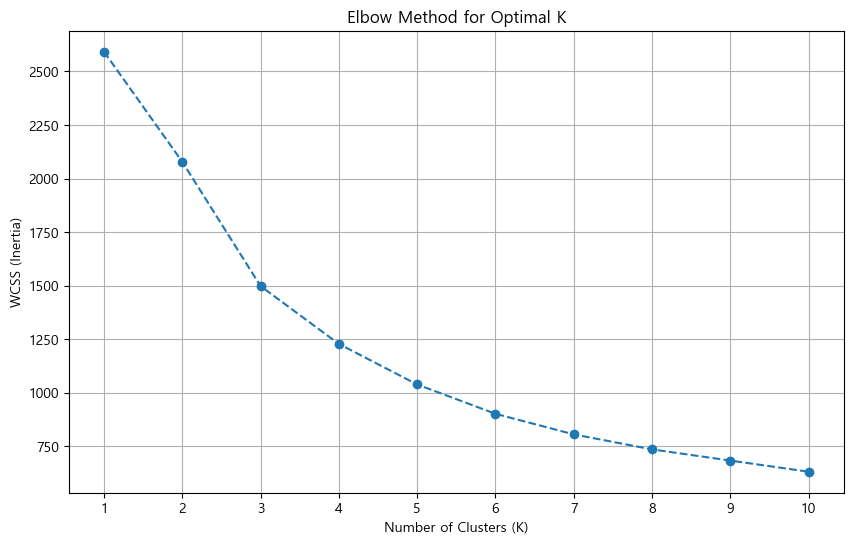

엘보우 그래프를 통해 WCSS 감소율이 급격히 줄어드는 지점을 최적의 K로 선택합니다.

--- K-means 클러스터링을 시작합니다. 최적의 K 값: 3 ---
--- K-means 클러스터링 결과 (K=3) - 상위 5개 역 ---
  station_name  cluster_label
0           가능              0
1         가락시장              1
2      가산디지털단지              1
3           간석              0
4           강남              1


--- 각 클러스터의 평균 특성 (스케일링되지 않은 원본 값) ---
               mean_congestion  max_congestion  mean_discomfort_index  \
cluster_label                                                           
0                    14.807946          57.128              57.493772   
1                    33.353439         119.000              58.478380   
2                     5.763542          74.000              27.118209   

               prop_high_discomfort    mean_ta    mean_hm   mean_ws  \
cluster_label                                                         
0                          0.049249  13.924248  66.224880  1.486053   
1                          0.051483  14.526342  62.392319  1.708383 

c:\Users\PC\anaconda3\envs\codeit_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


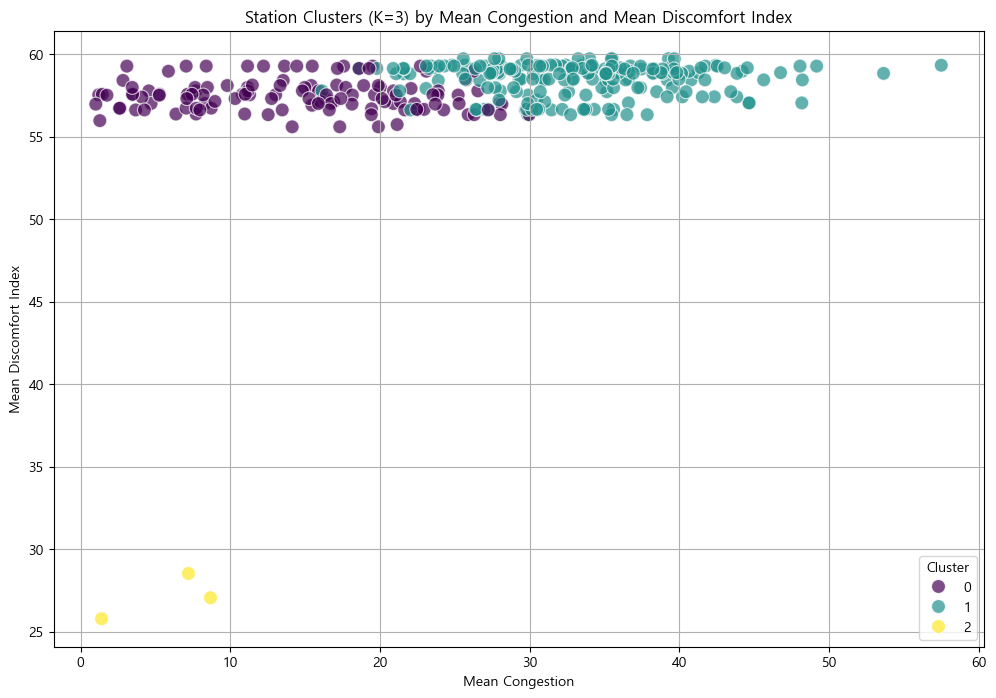

--- 각 클러스터에 속하는 역 이름 (상위 10개) ---

클러스터 0:
['가능', '간석', '강일', '개화산', '경찰병원', '고잔', '공릉', '광운대', '구산', '구파발']
------------------------------

클러스터 1:
['가락시장', '가산디지털단지', '강남', '강남구청', '강동', '강동구청', '강변', '개봉', '건대입구', '경마공원']
------------------------------

클러스터 2:
['연천', '전곡', '청산']
------------------------------


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

if 'is_high_discomfort' not in df_1.columns:
    df_1['is_high_discomfort'] = df_1['di_level'].isin(['불쾌', '매우 불쾌']).astype(int)

print("--- df_1 데이터프레임의 상위 5개 행 (확인용) ---")
print(df_1.head())
print("\n")

### 1. 데이터 준비 및 집계
# 역 별 특성을 나타내는 피처를 정의하고 집계합니다.
# 각 컬럼의 평균을 계산할 때 numeric_only=True를 명시적으로 적용합니다.
station_features = df_1.groupby('station_name').agg(
    mean_congestion=('congestion', lambda x: x.mean(numeric_only=True)),
    max_congestion=('congestion', 'max'),
    mean_discomfort_index=('discomfort_index', lambda x: x.mean(numeric_only=True)),
    prop_high_discomfort=('is_high_discomfort', lambda x: x.mean(numeric_only=True)), # 높은 불쾌지수 발생 비율
    mean_ta=('ta', lambda x: x.mean(numeric_only=True)),
    mean_hm=('hm', lambda x: x.mean(numeric_only=True)),
    mean_ws=('ws', lambda x: x.mean(numeric_only=True)),
    total_rn_day=('rn_day', 'sum') # sum()은 숫자형이 아닌 값을 자동으로 무시하므로 변경 불필요
).reset_index()

print("--- 역 별 집계된 피처 데이터 (상위 5개 행) ---")
print(station_features.head())
print("\n")

# 클러스터링에 사용할 피처 선택 (station_name 컬럼 제외)
features_for_clustering = station_features.drop(columns=['station_name'])

### 2. 피처 스케일링
# StandardScaler를 사용하여 피처들을 표준화합니다.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)
scaled_features_df = pd.DataFrame(scaled_features, columns=features_for_clustering.columns)

print("--- 스케일링된 피처 데이터 (상위 5개 행) ---")
print(scaled_features_df.head())
print("\n")

### 3. 최적의 클러스터 개수(K) 결정 (엘보우 방법)
# WCSS (Within-Cluster Sum of Squares) 또는 Inertia를 계산하여 엘보우 포인트를 찾습니다.
wcss = []
# 클러스터 개수 1부터 10까지 시도 (필요에 따라 범위 조정 가능)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11)) # x축 눈금을 1부터 10까지 표시
plt.grid(True)
plt.show()
print("엘보우 그래프를 통해 WCSS 감소율이 급격히 줄어드는 지점을 최적의 K로 선택합니다.\n")

### 4. K-means 클러스터링 적용
# 엘보우 방법을 통해 결정된 최적의 K 값을 사용합니다.
# 아래 optimal_k 값은 엘보우 그래프를 보고 채소리1님께서 직접 결정해야 합니다.
# 예시로 3을 사용하지만, 실제 그래프를 보고 가장 적절한 값을 선택하십시오.
optimal_k = 3

print(f"--- K-means 클러스터링을 시작합니다. 최적의 K 값: {optimal_k} ---")
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# 원본 역 피처 데이터에 클러스터 라벨 추가
station_features['cluster_label'] = cluster_labels

print(f"--- K-means 클러스터링 결과 (K={optimal_k}) - 상위 5개 역 ---")
print(station_features[['station_name', 'cluster_label']].head())
print("\n")

### 5. 군집 결과 해석 및 시각화

# 5.1. 각 군집의 평균 특성 분석
# 스케일링되지 않은 원본 피처를 사용하여 각 군집의 특성을 파악하는 것이 더 직관적입니다.
# station_name 컬럼을 제외하고 평균을 계산합니다.
cluster_summary = station_features.drop(columns=['station_name']).groupby('cluster_label').mean()
print("--- 각 클러스터의 평균 특성 (스케일링되지 않은 원본 값) ---")
print(cluster_summary)
print("\n")

# 5.2. 각 클러스터에 속한 역의 개수 확인
print("--- 각 클러스터에 속한 역의 개수 ---")
print(station_features['cluster_label'].value_counts().sort_index())
print("\n")

# 5.3. 시각화를 통해 군집 특성 파악
# 두 가지 주요 피처를 기준으로 클러스터링 결과 시각화
# 예: 'mean_congestion'과 'mean_discomfort_index'를 사용하여 시각화
plt.figure(figsize=(12, 8))
sns.scatterplot(data=station_features, x='mean_congestion', y='mean_discomfort_index',
                hue='cluster_label', palette='viridis', s=100, alpha=0.7)
plt.title(f'Station Clusters (K={optimal_k}) by Mean Congestion and Mean Discomfort Index')
plt.xlabel('Mean Congestion')
plt.ylabel('Mean Discomfort Index')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

# 5.4. 각 클러스터에 속하는 역 이름 확인 (일부)
print("--- 각 클러스터에 속하는 역 이름 (상위 10개) ---")
for i in range(optimal_k):
    print(f"\n클러스터 {i}:")
    # 해당 클러스터에 속하는 역이 없을 경우를 대비하여 조건문 추가
    if not station_features[station_features['cluster_label'] == i].empty:
        print(station_features[station_features['cluster_label'] == i]['station_name'].head(10).tolist())
    else:
        print("해당 클러스터에 속하는 역이 없습니다.")
    print("-" * 30)


In [57]:
df_1['station_name'].unique()

array(['서울역', '시청', '종각', '종로3가', '종로5가', '동대문', '신설동', '제기동', '청량리',
       '동묘앞', '남영', '용산', '노량진', '대방', '영등포', '신도림', '회기', '외대앞', '신이문',
       '석계', '광운대', '월계', '녹천', '창동', '신길', '구로', '개봉', '오류동', '역곡', '부천',
       '송내', '부평', '백운', '동암', '주안', '제물포', '동인천', '인천', '구일', '소사', '부개',
       '간석', '도원', '온수', '중동', '도화', '방학', '도봉', '도봉산', '망월사', '회룡',
       '의정부', '가능', '녹양', '양주', '덕계', '덕정', '지행', '동두천중앙', '보산', '동두천',
       '소요산', '청산', '전곡', '연천', '을지로입구', '을지로3가', '을지로4가', '동대문역사문화공원',
       '신당', '상왕십리', '왕십리', '한양대', '뚝섬', '성수', '건대입구', '구의', '강변', '잠실나루',
       '잠실', '잠실새내', '종합운동장', '삼성', '선릉', '역삼', '강남', '교대', '서초', '방배',
       '사당', '낙성대', '서울대입구', '봉천', '신림', '신대방', '구로디지털단지', '대림', '문래',
       '영등포구청', '당산', '합정', '홍대입구', '신촌(지하)', '이대', '아현', '충정로', '성수E',
       '지축', '구파발', '연신내', '불광', '녹번', '홍제', '무악재', '독립문', '경복궁', '안국',
       '충무로', '동대입구', '약수', '금호', '옥수', '압구정', '신사', '잠원', '고속터미널',
       '남부터미널', '양재', '매봉', '도곡', '대치', '학여울', '대청', '일원', '수서',

- 1. 클러스터 개수 및 분포
    - 최적의 클러스터 개수는 3개로 선정하셨고, 각 클러스터별 역 개수는 다음과 같습니다.
        - 클러스터 0: 125개 역
        - 클러스터 1: 196개 역
        - 클러스터 2: 3개 역 (매우 소수)

- 2. 클러스터별 특성 비교

|클러스터	|평균 혼잡도 (mean_congestion)	|최대 혼잡도 (max_congestion)	|평균 불쾌지수 (mean_discomfort_index)	|높은 불쾌지수 비율 (prop_high_discomfort)	|평균 기온 (mean_ta)	|평균 습도 (mean_hm)	|평균 풍속 (mean_ws)	|총 강수량 (total_rn_day)|
|----|----|----|----|---|---|---|---|----|
|0	|14.81	|57.13	|57.49	|0.049	|13.92	|66.22	|1.49	|101,710|
|1	|33.35	|119.00	|58.48	|0.051	|14.53	|62.39	|1.71	|154,151|
|2	|5.76	|74.00	|27.12	|0.000	|-5.86	|73.27	|0.99	|892|


- 클러스터 1은 평균 혼잡도와 최대 혼잡도가 가장 높고, 불쾌지수도 가장 높은 그룹입니다. 기온은 가장 높고, 강수량도 가장 많습니다.
- 클러스터 0은 중간 정도의 혼잡도와 불쾌지수를 보이며, 기온과 강수량도 중간 수준입니다.
- 클러스터 2는 평균 혼잡도와 불쾌지수가 매우 낮고, 기온도 매우 낮으며, 강수량도 거의 없는 특이한 그룹입니다. 역이 3개로 매우 적어 특수한 환경이나 데이터 특성을 가진 역일 가능성이 큽니다.

- 3. 시각화 해석
    - 산점도 그래프에서 클러스터 0과 1은 불쾌지수(세로축)가 비슷한 수준으로 높게 분포하지만, 혼잡도(가로축)에서는 클러스터 1이 훨씬 높은 값을 보입니다.
    - 클러스터 2는 혼잡도와 불쾌지수 모두 낮은 영역에 위치해 있어, 다른 두 클러스터와 명확히 구분됩니다.
- 4. 종합 해석 및 활용 방안
    - 클러스터 1 (고혼잡·고불쾌지수 그룹): 서울 주요 중심지나 출퇴근 시간대 혼잡이 심한 역일 가능성이 높습니다. 이 그룹은 혼잡 완화 및 쾌적한 환경 조성을 위한 우선 관리 대상입니다.
    - 클러스터 0 (중간 혼잡·중간 불쾌지수 그룹): 혼잡도와 불쾌지수가 중간 수준인 역들로, 관리 우선순위는 클러스터 1보다는 낮으나 주기적인 모니터링이 필요합니다.
    - 클러스터 2 (저혼잡·저불쾌지수 그룹): 혼잡도가 낮고 쾌적한 환경을 가진 역들로, 상대적으로 관리 부담이 적을 것으로 예상됩니다. 다만 역 수가 적어 개별 역 특성을 면밀히 분석할 필요가 있습니다.

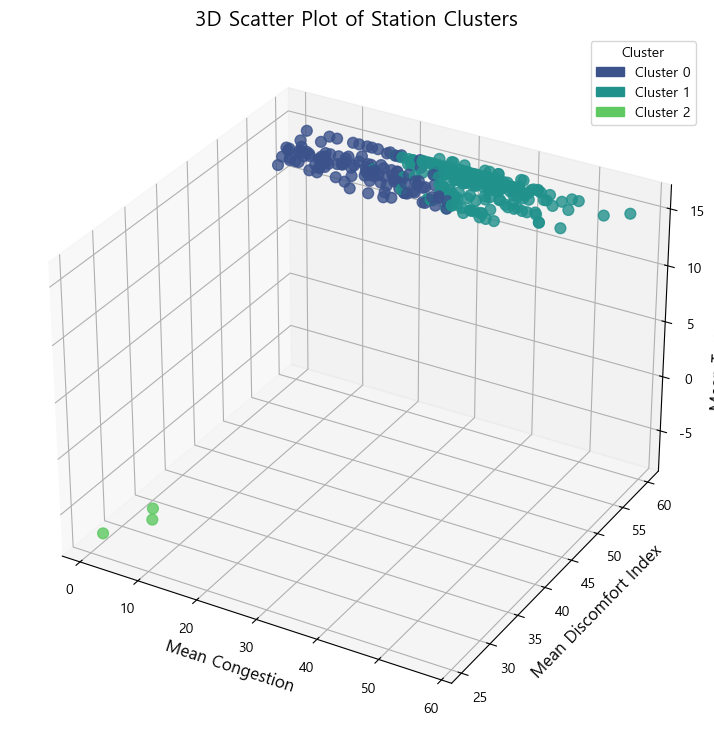

In [58]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 3D 플롯을 위한 모듈
import seaborn as sns

# 클러스터링 결과가 포함된 station_features 데이터프레임이 있다고 가정합니다.

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# x, y, z 축에 사용할 변수 지정
x = station_features['mean_congestion']
y = station_features['mean_discomfort_index']
z = station_features['mean_ta']

# 클러스터 라벨에 따라 색상 지정
clusters = station_features['cluster_label']
palette = sns.color_palette("viridis", n_colors=clusters.nunique())

# 클러스터별 색상 매핑
colors = [palette[label] for label in clusters]

# 3D 산점도 그리기
scatter = ax.scatter(x, y, z, c=colors, s=60, alpha=0.8)

# 축 라벨 설정
ax.set_xlabel('Mean Congestion', fontsize=12)
ax.set_ylabel('Mean Discomfort Index', fontsize=12)
ax.set_zlabel('Mean Temperature (Ta)', fontsize=12)

# 제목 설정
ax.set_title('3D Scatter Plot of Station Clusters', fontsize=15)

# 범례 생성
# 클러스터별 대표 색상과 이름을 범례로 표시
import matplotlib.patches as mpatches
legend_patches = [mpatches.Patch(color=palette[i], label=f'Cluster {i}') for i in range(clusters.nunique())]
ax.legend(handles=legend_patches, title='Cluster')

plt.show()

In [62]:
station_features

,station_name,mean_congestion,max_congestion,mean_discomfort_index,prop_high_discomfort,mean_ta,mean_hm,mean_ws,total_rn_day,cluster_label
0,가능,19.439286,58,56.694763,0.040522,13.421683,67.098763,0.561884,93893.312461,0
1,가락시장,28.121909,129,59.280310,0.062363,15.122763,60.435115,1.244568,404353.682504,1
2,가산디지털단지,35.397321,152,59.333417,0.057143,15.157563,59.349150,1.512963,106026.320000,1
3,간석,16.914698,69,57.120372,0.053709,13.746532,70.374030,1.288355,101334.791284,0
4,강남,45.631250,143,58.443883,0.084478,14.549424,71.041040,1.092833,101643.340738,1
...,...,...,...,...,...,...,...,...,...,...
319,화정,17.383173,69,57.312046,0.042308,13.867660,66.915858,1.683407,87721.379063,0
320,회기,20.884409,76,59.138458,0.044231,15.026786,57.513286,1.686778,116629.360000,1
321,회룡,23.695673,95,56.976171,0.067308,13.410060,73.342666,1.156868,97704.540565,0
322,회현,30.466209,80,56.656856,0.031044,13.210371,64.728970,2.333757,77810.566644,1


In [63]:
# station_features에는 'station_name'과 'cluster_label' 컬럼이 있습니다.
# df_1에 'cluster_label' 컬럼을 추가하기 위해 병합(merge)합니다.

df_1 = df_1.merge(
    station_features[['station_name', 'cluster_label']],
    on='station_name',
    how='left'  # df_1 기준으로 병합, 없는 역은 NaN 처리
)

# 병합 결과 확인
print(df_1[['station_name', 'cluster_label']].head())


  station_name  cluster_label
0          서울역              1
1          서울역              1
2          서울역              1
3          서울역              1
4          서울역              1


In [65]:
# df_1을 CSV 파일로 저장
df_1.to_csv('df_1_with_cluster.csv', index=False, encoding='utf-8-sig')

print("df_1 데이터프레임이 'df_1_with_cluster.csv' 파일로 저장되었습니다.")

df_1 데이터프레임이 'df_1_with_cluster.csv' 파일로 저장되었습니다.


---

# 다중 공선성 확인.

In [45]:
df_1_processed = df_1.copy()
df_1_processed['DAY_OF_WEEK'] = df_1_processed['date_dt'].dt.dayofweek


In [47]:
# ✅ Step 1: 요일 컬럼 생성 및 복사
df_1_processed = df_1.copy()
df_1_processed['DAY_OF_WEEK'] = df_1_processed['date_dt'].dt.dayofweek

# ✅ Step 2: 학습 데이터 샘플링 (5%) - 원핫 인코딩 전에!
df_1_processed = df_1_processed.sample(frac=0.05, random_state=42)

# ✅ Step 3: 변수 선택 및 정리
numerical_features = [
    'ta', 'hm', 'ws', 'discomfort_index', 'hour',
    'is_weekend_or_holiday', 'line', 'station_number', 'DAY_OF_WEEK'
]
categorical_features = ['station_name', 'direction']
target_variable = 'congestion'

# ✅ Step 4: 원-핫 인코딩 (카테고리 변수)
encoded_features = pd.get_dummies(df_1_processed[categorical_features], drop_first=True)

# ✅ Step 5: 최종 피처 데이터프레임 구성
final_features_df = pd.concat([
    df_1_processed[numerical_features],
    encoded_features,
    df_1_processed[[target_variable]]
], axis=1)

# ✅ Step 6: 학습/검증 데이터 분할
from sklearn.model_selection import train_test_split
X = final_features_df.drop(target_variable, axis=1)
y = final_features_df[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 7: 다중공선성 점검 (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 타입 정리
for col in X_train.select_dtypes(include='bool').columns:
    X_train[col] = X_train[col].astype(int)
X_train = X_train.drop(columns=X_train.select_dtypes(include='object').columns)
X_train = X_train.fillna(0)

# VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# 출력
print("--- VIF (다중공선성 확인) ---")
print(vif_data.sort_values("VIF", ascending=False))


--- VIF (다중공선성 확인) ---
              feature         VIF
3    discomfort_index  515.459965
6                line  120.146219
7      station_number  102.178614
0                  ta   95.975459
334      direction_하선   33.395444
..                ...         ...
143   station_name_부개    1.521577
284   station_name_주엽    1.510067
231   station_name_연천    1.024492
273   station_name_전곡    1.021802
302   station_name_청산    1.020463

[335 rows x 2 columns]


In [48]:
# ✅ Step 1: 요일 컬럼 생성 및 복사
df_1_processed = df_1.copy()
df_1_processed['DAY_OF_WEEK'] = df_1_processed['date_dt'].dt.dayofweek

# ✅ Step 2: 학습 데이터 샘플링 (5%) - 원핫 인코딩 전에!
df_1_processed = df_1_processed.sample(frac=0.05, random_state=42)
# 샘플링 후 데이터가 너무 적을 경우를 대비하여 최소 샘플 수 확인
if len(df_1_processed) < 2: # VIF 계산을 위해 최소 2개 이상의 샘플 필요
    print("샘플링된 데이터의 수가 너무 적어 VIF 계산이 어렵습니다. 샘플링 비율을 조정하거나 더 많은 원본 데이터를 사용해주세요.")
    # 이 경우, VIF 계산을 건너뛰거나 다른 처리를 할 수 있습니다.
    # 여기서는 예시를 위해 샘플링 비율을 조정하지 않고 진행합니다.

# ✅ Step 3: 변수 선택 및 정리
numerical_features = [
    'ta', 'hm', 'ws', 'discomfort_index', 'hour',
    'is_weekend_or_holiday', 'line', 'station_number', 'DAY_OF_WEEK'
]
# station_name을 categorical_features에서 제외합니다.
categorical_features = ['direction'] # station_name 제외
target_variable = 'congestion'

# ✅ Step 4: 원-핫 인코딩 (카테고리 변수)
# station_name이 제외된 categorical_features로 인코딩합니다.
encoded_features = pd.get_dummies(df_1_processed[categorical_features], drop_first=True)

# ✅ Step 5: 최종 피처 데이터프레임 구성
# station_name은 포함되지 않습니다.
final_features_df = pd.concat([
    df_1_processed[numerical_features],
    encoded_features,
    df_1_processed[[target_variable]]
], axis=1)

# ✅ Step 6: 학습/검증 데이터 분할
X = final_features_df.drop(target_variable, axis=1)
y = final_features_df[target_variable]

# 샘플링된 데이터가 너무 적어 train_test_split이 오류를 발생시킬 수 있으므로 확인
if len(X) > 1:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    print("데이터가 너무 적어 학습/검증 데이터 분할을 수행할 수 없습니다.")
    X_train, X_test, y_train, y_test = X, pd.DataFrame(), y, pd.DataFrame() # 빈 데이터프레임으로 초기화

# ✅ Step 7: 다중공선성 점검 (VIF)
if not X_train.empty:
    # 타입 정리
    for col in X_train.select_dtypes(include='bool').columns:
        X_train[col] = X_train[col].astype(int)
    X_train = X_train.drop(columns=X_train.select_dtypes(include='object').columns, errors='ignore') # object 타입 컬럼 제거
    X_train = X_train.fillna(0)

    # VIF 계산
    # VIF 계산을 위해 데이터프레임에 최소한의 컬럼이 있어야 합니다.
    if X_train.shape[1] > 0:
        vif_data = pd.DataFrame()
        vif_data["feature"] = X_train.columns
        # VIF 계산 시 무한대 값이 나올 수 있으므로, 이를 처리합니다.
        vif_values = []
        for i in range(X_train.shape[1]):
            try:
                vif_values.append(variance_inflation_factor(X_train.values, i))
            except Exception as e:
                vif_values.append(float('inf')) # 계산 오류 시 무한대 처리
                print(f"VIF 계산 중 오류 발생: {e} (컬럼: {X_train.columns[i]})")
        vif_data["VIF"] = vif_values

        # 출력
        print("--- VIF (다중공선성 확인) ---")
        print(vif_data.sort_values("VIF", ascending=False))
    else:
        print("VIF를 계산할 피처가 없습니다.")
else:
    print("학습 데이터가 없어 VIF를 계산할 수 없습니다.")

--- VIF (다중공선성 확인) ---
                  feature        VIF
3        discomfort_index  90.928637
0                      ta  20.389840
1                      hm  10.339153
11           direction_하선   8.919842
9            direction_상선   8.905896
6                    line   8.029015
8             DAY_OF_WEEK   6.434579
4                    hour   5.893495
7          station_number   5.680917
2                      ws   2.957488
5   is_weekend_or_holiday   2.920716
10           direction_외선   1.962000


In [49]:
# ✅ Step 1: 요일 컬럼 생성 및 복사
df_1_processed = df_1.copy()
df_1_processed['DAY_OF_WEEK'] = df_1_processed['date_dt'].dt.dayofweek

# ✅ Step 2: 학습 데이터 샘플링 (5%) - 원핫 인코딩 전에 수행
df_1_processed = df_1_processed.sample(frac=0.05, random_state=42)
if len(df_1_processed) < 2:
    print("샘플링된 데이터 수가 너무 적어 VIF를 계산할 수 없습니다. 샘플 비율을 조정하거나 더 많은 원본 데이터를 사용하세요.")

# ✅ Step 3: 변수 선택 및 정리
numerical_features = [
    'ta', 'hm', 'ws', 'discomfort_index', 'hour',
    'is_weekend_or_holiday', 'line', 'station_number', 'DAY_OF_WEEK'
]
categorical_features = ['direction']  # station_name 제외
target_variable = 'congestion'

# ✅ Step 4: 원-핫 인코딩 (카테고리 변수)
encoded_features = pd.get_dummies(df_1_processed[categorical_features], drop_first=True)

# ✅ Step 5: 최종 피처 데이터프레임 구성
final_features_df = pd.concat([
    df_1_processed[numerical_features],
    encoded_features,
    df_1_processed[[target_variable]]
], axis=1)

# ✅ Step 6: 학습/검증 데이터 분할
X = final_features_df.drop(target_variable, axis=1)
y = final_features_df[target_variable]

if len(X) > 1:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    print("데이터가 너무 적어 학습/검증 분할을 수행할 수 없습니다.")
    X_train, X_test, y_train, y_test = X, pd.DataFrame(), y, pd.DataFrame()

# ✅ Step 7: 다중공선성 점검 (VIF)
if not X_train.empty:
    # 타입 정리
    for col in X_train.select_dtypes(include='bool').columns:
        X_train[col] = X_train[col].astype(int)
    X_train = X_train.drop(columns=X_train.select_dtypes(include='object').columns, errors='ignore')
    X_train = X_train.fillna(0)

    if X_train.shape[1] > 0:
        vif_data = pd.DataFrame()
        vif_data["feature"] = X_train.columns
        vif_values = []
        for i in range(X_train.shape[1]):
            try:
                vif_values.append(variance_inflation_factor(X_train.values, i))
            except Exception as e:
                vif_values.append(float('inf'))
                print(f"VIF 계산 중 오류 발생: {e} (열: {X_train.columns[i]})")
        vif_data["VIF"] = vif_values

        # 출력
        print("--- VIF (다중공선성 확인) ---")
        print(vif_data.sort_values("VIF", ascending=False))
    else:
        print("VIF 계산에 사용할 피처가 없습니다.")
else:
    print("학습 데이터가 없어 VIF 계산을 수행할 수 없습니다.")


--- VIF (다중공선성 확인) ---
                  feature        VIF
3        discomfort_index  90.928637
0                      ta  20.389840
1                      hm  10.339153
11           direction_하선   8.919842
9            direction_상선   8.905896
6                    line   8.029015
8             DAY_OF_WEEK   6.434579
4                    hour   5.893495
7          station_number   5.680917
2                      ws   2.957488
5   is_weekend_or_holiday   2.920716
10           direction_외선   1.962000


In [51]:
# ✅ Step 8: 선형 회귀 모델 적합 및 회귀 진단
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train_const).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             congestion   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     2015.
Date:                Mon, 23 Jun 2025   Prob (F-statistic):               0.00
Time:                        17:36:05   Log-Likelihood:            -9.2552e+05
No. Observations:              210323   AIC:                         1.851e+06
Df Residuals:                  210310   BIC:                         1.851e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    43.02

In [52]:
# ✅ Step 9: 이상치 및 영향 관측치 확인 (Leverage, Cook's Distance)
influence = lm.get_influence()
summary_frame = influence.summary_frame()
print("--- 이상치 및 영향 관측치 상위 5개 ---")
print(summary_frame[['hat_diag', 'cooks_d']].sort_values("cooks_d", ascending=False).head())

--- 이상치 및 영향 관측치 상위 5개 ---
          hat_diag   cooks_d
10892809  0.000131  0.000854
10964839  0.000118  0.000729
10729299  0.000122  0.000647
10889738  0.000068  0.000546
10886718  0.000064  0.000525


In [53]:
summary_frame

,dfb_const,dfb_ta,dfb_hm,dfb_ws,dfb_discomfort_index,dfb_hour,dfb_is_weekend_or_holiday,dfb_line,dfb_station_number,dfb_DAY_OF_WEEK,dfb_direction_상선,dfb_direction_외선,dfb_direction_하선,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
10632361,-0.000041,-0.000038,-0.000070,-0.000001,0.000042,0.000012,9.380771e-08,0.000075,-0.000010,0.000041,-0.000019,-2.465880e-07,-0.000046,2.027937e-09,-0.025173,0.000042,-0.000162,-0.025173,-0.000162
15215584,0.002360,0.003154,-0.002160,-0.000731,-0.002615,-0.000009,2.480370e-03,0.000577,0.002713,-0.000068,0.000029,-1.713387e-05,-0.001124,5.122773e-06,1.064349,0.000059,0.008161,1.064350,0.008161
14237257,0.000088,0.000189,0.000261,0.000214,-0.000169,0.000235,-2.717071e-04,-0.000102,-0.000063,0.000003,-0.000076,5.985928e-08,0.000052,4.189851e-08,-0.118379,0.000039,-0.000738,-0.118378,-0.000738
14143725,0.000210,0.000234,-0.000177,0.000095,-0.000220,-0.000002,-1.468295e-04,0.000041,0.000032,0.000137,-0.000021,-8.696851e-07,0.000030,1.237388e-08,0.046801,0.000073,0.000401,0.046801,0.000401
13460176,0.001012,0.000814,-0.001161,-0.001065,-0.000664,-0.001217,2.993563e-05,-0.000154,0.000453,-0.000631,-0.000093,3.198024e-06,0.000348,5.812835e-07,0.406248,0.000046,0.002749,0.406247,0.002749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12097989,0.002066,0.002304,-0.001999,0.002732,-0.002109,0.002641,1.734300e-04,0.000699,-0.004617,-0.002787,0.003381,-3.301737e-05,0.001546,8.046237e-06,1.682757,0.000037,0.010227,1.682764,0.010228
12537345,-0.000812,-0.001502,0.001215,0.000936,0.001025,-0.000482,3.108525e-03,-0.002371,0.005112,-0.002221,-0.002815,2.614991e-05,-0.001158,6.051046e-06,-1.521147,0.000034,-0.008869,-1.521151,-0.008869
13881270,0.000068,0.000070,-0.000177,-0.000102,-0.000064,0.000109,6.174309e-05,-0.000021,0.000059,0.000075,-0.000012,-7.486287e-07,0.000042,9.356023e-09,0.050361,0.000048,0.000349,0.050361,0.000349
13777702,-0.000555,-0.000797,-0.000608,0.000312,0.000759,-0.000155,2.251763e-04,-0.000063,0.000240,-0.000603,-0.000050,4.027478e-06,0.000161,1.777785e-07,0.193511,0.000062,0.001520,0.193510,0.001520


In [50]:
# --- 1. 'date_dt' 컬럼에서 'day_of_week' (요일) 추출 ---
# 월요일=0, 일요일=6으로 인코딩됩니다.
# .copy()를 사용하여 원본 df_1에 영향을 주지 않고 새로운 컬럼을 추가합니다.
df_1_processed = df_1.copy()
df_1_processed['day_of_week'] = df_1_processed['date_dt'].dt.dayofweek

print("--- 'day_of_week' 컬럼 추가 후 데이터프레임 상위 5개 행 ---")
print(df_1_processed[['date_dt', 'day_of_week']].head())
print("\n" + "="*70 + "\n")

# --- 2. 최종 피처 셋에 포함할 변수 정의 ---
# 'congestion'은 예측 모델의 타겟 변수이므로, 최종 데이터프레임에 포함하되 나중에 분리하여 사용합니다.
numerical_features = [
    'ta', 'hm', 'ws', 'discomfort_index', 'hour', 'month',
    'day_of_week', 'is_weekend_or_holiday', 'line', 'station_number'
]
categorical_features = [
    'station_name', 'direction'
]
target_variable = 'congestion'

# --- 3. 범주형 변수 원-핫 인코딩 ---
# pd.get_dummies를 사용하여 범주형 변수를 원-핫 인코딩합니다.
# drop_first=True는 다중공선성(Multicollinearity)을 방지하기 위해 각 범주형 변수의 첫 번째 카테고리를 제거합니다.
encoded_features = pd.get_dummies(df_1_processed[categorical_features], columns=categorical_features, drop_first=True)

print("--- 원-핫 인코딩된 범주형 피처 상위 5개 행 ---")
print(encoded_features.head())
print("\n" + "="*70 + "\n")

# --- 4. 모든 피처 결합 ---
# 선택된 수치형 피처와 원-핫 인코딩된 범주형 피처, 그리고 타겟 변수를 합칩니다.
final_features_df = pd.concat([
    df_1_processed[numerical_features], # 수치형 피처
    encoded_features,                   # 원-핫 인코딩된 범주형 피처
    df_1_processed[[target_variable]]   # 타겟 변수
], axis=1)

print("--- 최종 피처 셋 (final_features_df) 정보 ---")
final_features_df.info()
print("\n" + "="*70 + "\n")

print("--- 최종 피처 셋 (final_features_df) 상위 5개 행 ---")
print(final_features_df.head())

# --- 추가 고려사항 ---
# 'station_number'는 현재 int64 타입으로 수치형으로 처리되었습니다.
# 만약 'station_number'가 단순한 ID이고, 'station_name'으로 역을 충분히 구분할 수 있다면,
# 'station_number'는 제거하거나 범주형으로 처리하는 것을 고려해볼 수 있습니다.
# 이는 데이터의 실제 의미와 모델의 목적에 따라 달라질 수 있습니다.

--- 'day_of_week' 컬럼 추가 후 데이터프레임 상위 5개 행 ---
            date_dt  day_of_week
10331755 2023-01-01            6
10331756 2023-01-01            6
10331757 2023-01-01            6
10331758 2023-01-01            6
10331759 2023-01-01            6


--- 원-핫 인코딩된 범주형 피처 상위 5개 행 ---
          station_name_가락시장  station_name_가산디지털단지  station_name_간석  \
10331755              False                 False            False   
10331756              False                 False            False   
10331757              False                 False            False   
10331758              False                 False            False   
10331759              False                 False            False   

          station_name_강남  station_name_강남구청  station_name_강동  \
10331755            False              False            False   
10331756            False              False            False   
10331757            False              False            False   
10331758            False              Fal

- 목적: 혼잡도에 영향을 미치는 시간적 패턴, 특히 요일별 특성을 모델에 반영하기 위함입니다.
- 설명: 지하철 혼잡도는 요일에 따라 크게 달라지는 경향이 있습니다. 
    - 예를 들어, 평일 출퇴근 시간과 주말의 혼잡도 패턴은 매우 다를 것입니다. date_dt 컬럼은 날짜와 시간 정보를 담고 있으며, 이로부터 요일 정보를 추출하여 새로운 피처(day_of_week)로 추가함으로써, 모델이 요일별 혼잡도 변화를 학습할 수 있도록 돕습니다. 이는 시간 관련 피처 엔지니어링의 중요한 부분입니다.

In [49]:
# --- 1. 'date_dt' 컬럼에서 'day_of_week' (요일) 추출 ---
# 월요일=0, 일요일=6으로 인코딩됩니다.
# .copy()를 사용하여 원본 df_1에 영향을 주지 않고 새로운 컬럼을 추가합니다.
df_1_processed = df_1.copy()
df_1_processed['day_of_week'] = df_1_processed['date_dt'].dt.dayofweek

print("--- 'day_of_week' 컬럼 추가 후 데이터프레임 상위 5개 행 ---")
print(df_1_processed[['date_dt', 'day_of_week']].head())
print("\n" + "="*70 + "\n")

--- 'day_of_week' 컬럼 추가 후 데이터프레임 상위 5개 행 ---
            date_dt  day_of_week
10331755 2023-01-01            6
10331756 2023-01-01            6
10331757 2023-01-01            6
10331758 2023-01-01            6
10331759 2023-01-01            6




- 2. 최종 피처 셋에 포함할 변수 정의
- 목적: 혼잡도 예측 또는 원인 분석에 가장 적합하고 의미 있는 변수들을 선별하여 모델의 입력값으로 사용하기 위함입니다.
- 설명: 모든 컬럼을 모델에 사용하는 것이 항상 좋은 것은 아닙니다. 
    - 불필요하거나 관련성이 낮은 변수는 모델의 복잡도를 높이고, 학습 시간을 늘리며, 때로는 성능을 저하시킬 수도 있습니다. 
    - 이전 상관 분석을 통해 혼잡도와 유의미한 관계를 보인 기상/환경 변수(ta, hm, ws, discomfort_index)와 더불어, 시간(hour, month, day_of_week), 공간(line, station_number, station_name, direction), 그리고 요일/휴일(is_weekend_or_holiday)과 같은 핵심적인 변수들을 명확히 정의함으로써, 모델이 혼잡도에 영향을 미치는 주요 요인들을 집중적으로 학습할 수 있도록 합니다.

In [50]:
# --- 2. 최종 피처 셋에 포함할 변수 정의 ---
# 'congestion'은 예측 모델의 타겟 변수이므로, 최종 데이터프레임에 포함하되 나중에 분리하여 사용합니다.
numerical_features = [
    'ta', 'hm', 'ws', 'discomfort_index', 'hour', 'month',
    'day_of_week', 'is_weekend_or_holiday', 'line', 'station_number'
]
categorical_features = [
    'station_name', 'direction'
]
target_variable = 'congestion'


- 3. 범주형 변수 원-핫 인코딩
- 목적: station_name이나 direction과 같이 숫자형이 아닌 범주형 데이터를 머신러닝 모델이 이해하고 처리할 수 있는 숫자 형태로 변환하기 위함입니다.
- 설명: 대부분의 머신러닝 알고리즘은 숫자형 데이터를 입력으로 받습니다. '강남역', '상행'과 같은 텍스트 형태의 범주형 데이터는 그대로 모델에 사용할 수 없습니다. 
    - 원-핫 인코딩은 각 범주(예: '강남역', '홍대입구역')를 독립적인 이진(0 또는 1) 컬럼으로 변환하는 방법입니다. 예를 들어, 'station_name'이 '강남역', '홍대입구역', '역삼역'이라면, 'station_name_강남역', 'station_name_홍대입구역', 'station_name_역삼역'과 같은 새로운 컬럼이 생성되고, 해당 역에 해당하는 컬럼만 1의 값을 가지게 됩니다. drop_first=True 옵션은 다중공선성(Multicollinearity) 문제를 방지하기 위해 각 범주형 변수의 첫 번째 카테고리를 제거하여, 모델이 불필요하게 중복된 정보를 학습하지 않도록 합니다.

In [51]:
# --- 3. 범주형 변수 원-핫 인코딩 ---
# pd.get_dummies를 사용하여 범주형 변수를 원-핫 인코딩합니다.
# drop_first=True는 다중공선성(Multicollinearity)을 방지하기 위해 각 범주형 변수의 첫 번째 카테고리를 제거합니다.
encoded_features = pd.get_dummies(df_1_processed[categorical_features], columns=categorical_features, drop_first=True)

print("--- 원-핫 인코딩된 범주형 피처 상위 5개 행 ---")
print(encoded_features.head())
print("\n" + "="*70 + "\n")

--- 원-핫 인코딩된 범주형 피처 상위 5개 행 ---
          station_name_가락시장  station_name_가산디지털단지  station_name_간석  \
10331755              False                 False            False   
10331756              False                 False            False   
10331757              False                 False            False   
10331758              False                 False            False   
10331759              False                 False            False   

          station_name_강남  station_name_강남구청  station_name_강동  \
10331755            False              False            False   
10331756            False              False            False   
10331757            False              False            False   
10331758            False              False            False   
10331759            False              False            False   

          station_name_강동구청  station_name_강변  station_name_강일  \
10331755              False            False            False   
10331756              Fals

- 4. 모든 피처 결합
- 목적: 전처리 및 피처 엔지니어링을 거친 모든 독립 변수(피처)와 예측하고자 하는 종속 변수(타겟)를 하나의 통합된 데이터셋으로 구성하여, 모델 학습에 바로 사용할 수 있는 형태로 준비하기 위함입니다.
- 설명: 이 단계에서는 숫자형으로 이미 준비된 피처들, 원-핫 인코딩을 통해 숫자형으로 변환된 범주형 피처들, 그리고 모델이 예측해야 할 타겟 변수(congestion)를 하나의 데이터프레임으로 합칩니다. 
    - 이렇게 통합된 데이터프레임은 이후 회귀 모델이나 예측 모델의 fit() 함수에 직접 입력될 수 있는 표준화된 형태가 됩니다. 
    - 이는 모델 학습을 위한 최종적인 데이터셋을 완성하는 과정입니다.

In [55]:
# --- 4. 모든 피처 결합 ---
# 선택된 수치형 피처와 원-핫 인코딩된 범주형 피처, 그리고 타겟 변수를 합칩니다.
final_features_df = pd.concat([
    df_1_processed[numerical_features], # 수치형 피처
    encoded_features,                   # 원-핫 인코딩된 범주형 피처
    df_1_processed[[target_variable]]   # 타겟 변수
], axis=1)

print("--- 최종 피처 셋 (final_features_df) 정보 ---")
final_features_df.info()
print("\n" + "="*70 + "\n")

print("--- 최종 피처 셋 (final_features_df) 상위 5개 행 ---")
print(final_features_df.head())


--- 최종 피처 셋 (final_features_df) 정보 ---
<class 'pandas.core.frame.DataFrame'>
Index: 5258078 entries, 10331755 to 15589832
Columns: 337 entries, ta to congestion
dtypes: bool(326), float64(4), int32(2), int64(5)
memory usage: 2.0 GB


--- 최종 피처 셋 (final_features_df) 상위 5개 행 ---
           ta    hm   ws  discomfort_index  hour  month  day_of_week  \
10331755  0.3  66.5  3.4         37.231005     0      1            6   
10331756 -0.8  55.1  3.7         37.336308     5      1            6   
10331757 -1.8  62.8  3.4         34.742504     6      1            6   
10331758 -2.6  68.8  2.9         32.584688     7      1            6   
10331759 -3.0  70.4  2.8         31.711920     8      1            6   

          is_weekend_or_holiday  line  station_number  ...  station_name_화랑대  \
10331755                      1     1             150  ...             False   
10331756                      1     1             150  ...             False   
10331757                      1     1            

In [71]:
final_features_df

,ta,hm,ws,discomfort_index,hour,month,day_of_week,is_weekend_or_holiday,line,station_number,...,station_name_화랑대,station_name_화정,station_name_회기,station_name_회룡,station_name_회현,station_name_효창공원앞,direction_상선,direction_외선,direction_하선,congestion
10331755,0.3,66.5,3.4,37.231005,0,1,6,1,1,150,...,False,False,False,False,False,False,True,False,False,0
10331756,-0.8,55.1,3.7,37.336308,5,1,6,1,1,150,...,False,False,False,False,False,False,True,False,False,3
10331757,-1.8,62.8,3.4,34.742504,6,1,6,1,1,150,...,False,False,False,False,False,False,True,False,False,6
10331758,-2.6,68.8,2.9,32.584688,7,1,6,1,1,150,...,False,False,False,False,False,False,True,False,False,5
10331759,-3.0,70.4,2.8,31.711920,8,1,6,1,1,150,...,False,False,False,False,False,False,True,False,False,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15589828,0.6,83.1,0.0,35.396314,19,12,6,1,8,2828,...,False,False,False,False,False,False,False,False,True,18
15589829,0.0,84.7,0.0,34.187900,20,12,6,1,8,2828,...,False,False,False,False,False,False,False,False,True,17
15589830,-0.6,85.1,0.0,33.139206,21,12,6,1,8,2828,...,False,False,False,False,False,False,False,False,True,21
15589831,-0.8,85.6,0.0,32.733248,22,12,6,1,8,2828,...,False,False,False,False,False,False,False,False,True,18


In [75]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# 채소리1님의 final_features_df가 이미 정의되어 있다고 가정합니다.
# 만약 이 코드를 별도로 실행하신다면, final_features_df를 먼저 생성해야 합니다.
# 예시: final_features_df = pd.DataFrame(...)

print("--- 선형 회귀 모델 구축 시작 (데이터 타입 정리 및 샘플링 적용) ---")

# --- 1. 피처(X)와 타겟(y) 분리 ---
X = final_features_df.drop('congestion', axis=1)
y = final_features_df['congestion']

# --- 2. 학습(Train) 및 테스트(Test) 데이터셋 분할 ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3. 메모리 오류 방지를 위한 학습 데이터 샘플링 ---
sample_frac = 0.2 # 샘플링 비율 (예: 0.2는 20%)
X_train_sampled = X_train.sample(frac=sample_frac, random_state=42)
y_train_sampled = y_train.sample(frac=sample_frac, random_state=42)

print(f"원본 학습 데이터 크기: {len(X_train)} 행")
print(f"샘플링된 학습 데이터 크기: {len(X_train_sampled)} 행 ({sample_frac*100:.0f}%)")

# --- 4. 데이터 타입 정리: bool 타입을 int로 변환하고, object 타입 확인 및 처리 ---
# 모든 bool 타입 컬럼을 int (0 또는 1)로 변환합니다.
for col in X_train_sampled.select_dtypes(include='bool').columns:
    X_train_sampled[col] = X_train_sampled[col].astype(int)

# 혹시 모를 object 타입 컬럼이 있다면 확인하고 처리합니다.
# 일반적으로 원-핫 인코딩 후에는 object 타입이 남지 않아야 하지만,
# 데이터에 따라 예외적인 경우가 있을 수 있습니다.
object_cols = X_train_sampled.select_dtypes(include='object').columns
if len(object_cols) > 0:
    print(f"\n경고: 다음 object 타입 컬럼이 발견되었습니다. 모델 학습에 문제가 될 수 있습니다: {list(object_cols)}")
    print("이 컬럼들을 제거하거나 추가적인 전처리가 필요할 수 있습니다.")
    # 여기서는 간단히 제거하는 예시를 보여드리지만, 실제 데이터에 따라 다른 처리가 필요할 수 있습니다.
    # X_train_sampled = X_train_sampled.drop(columns=object_cols)
    # y_train_sampled = y_train_sampled.drop(columns=object_cols) # y는 object 타입이 아닐 것이므로 필요 없음

# 결측치(NaN)가 있다면 0으로 채웁니다. (원-핫 인코딩된 컬럼의 NaN은 0으로 처리하는 경우가 많음)
# 만약 결측치가 있다면, 해당 컬럼이 object로 변환될 수 있습니다.
if X_train_sampled.isnull().sum().sum() > 0:
    print("\n경고: X_train_sampled에 결측치가 발견되었습니다. 0으로 채웁니다.")
    X_train_sampled = X_train_sampled.fillna(0)


print("\n--- 샘플링된 학습 데이터(X_train_sampled)의 최종 데이터 타입 확인 ---")
print(X_train_sampled.info())
print("\n" + "="*70 + "\n")

# --- 5. 선형 회귀 모델 학습 (statsmodels 사용) ---
# 샘플링된 데이터에 상수항을 추가합니다.
X_train_sm = sm.add_constant(X_train_sampled)

# OLS (Ordinary Least Squares, 최소제곱법) 모델을 정의하고 학습합니다.
model = sm.OLS(y_train_sampled, X_train_sm)
results = model.fit()

# --- 6. 모델 결과 요약 출력 ---
print("\n--- 선형 회귀 모델 결과 요약 ---")
print(results.summary())

print("\n--- 선형 회귀 모델 구축 완료 ---")


--- 선형 회귀 모델 구축 시작 (데이터 타입 정리 및 샘플링 적용) ---
원본 학습 데이터 크기: 4206462 행
샘플링된 학습 데이터 크기: 841292 행 (20%)

--- 샘플링된 학습 데이터(X_train_sampled)의 최종 데이터 타입 확인 ---
<class 'pandas.core.frame.DataFrame'>
Index: 841292 entries, 15490646 to 13550849
Columns: 336 entries, ta to direction_하선
dtypes: float64(4), int32(328), int64(4)
memory usage: 1.1 GB
None



--- 선형 회귀 모델 결과 요약 ---
                            OLS Regression Results                            
Dep. Variable:             congestion   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     1322.
Date:                Sun, 22 Jun 2025   Prob (F-statistic):               0.00
Time:                        20:38:33   Log-Likelihood:            -3.5709e+06
No. Observations:              841292   AIC:                         7.142e+06
Df Residuals:                  840955   BIC:                         7.146e+06
D

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16500\3531462902.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients_to_plot.values, y=coefficients_to_plot.index, palette='coolwarm')


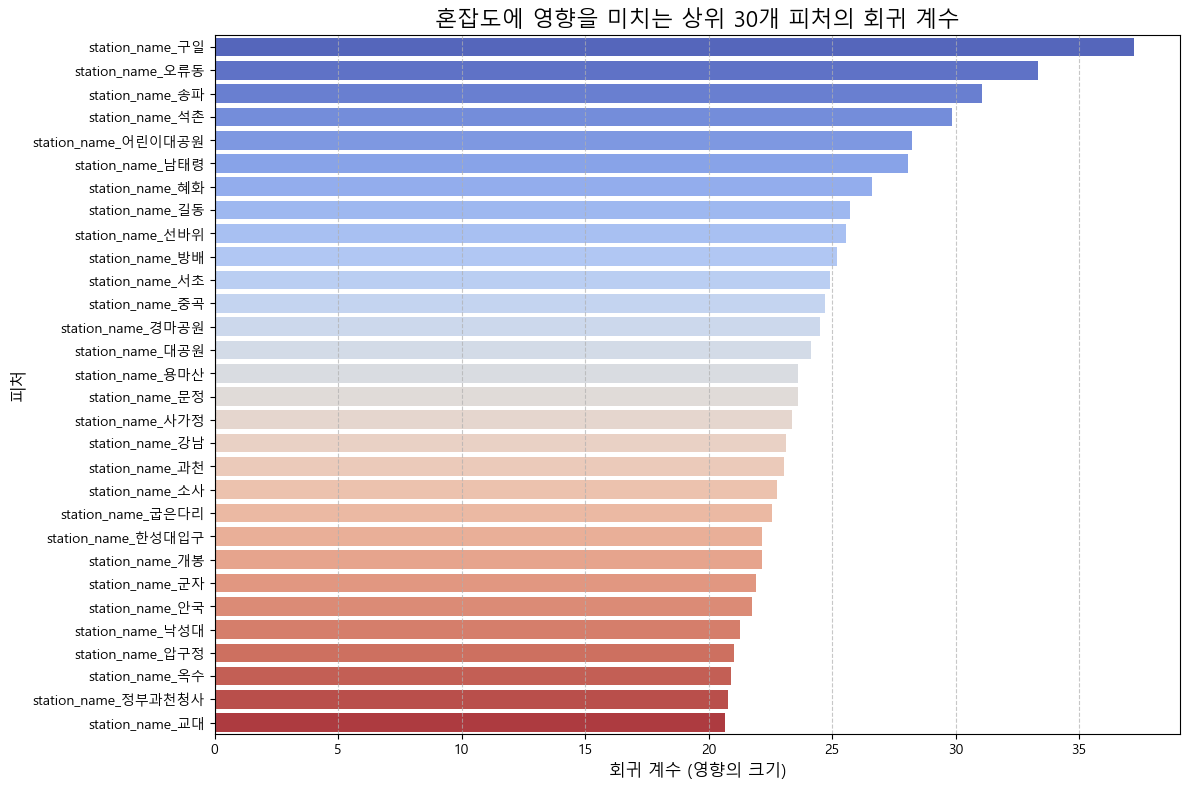

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# results는 sm.OLS().fit()의 결과 객체입니다.
# 이전에 실행된 results 객체가 있다고 가정합니다.

# 1. 계수(Coef) 값 추출
# results.params는 각 피처의 계수 값을 담고 있는 Series입니다.
coefficients = results.params.drop('const') # 상수항(const)은 보통 시각화에서 제외합니다.

# 2. 계수 값의 절댓값을 기준으로 정렬
# 혼잡도에 가장 큰 영향을 미치는 피처들을 상단에 배치하기 위함입니다.
coefficients_sorted = coefficients.abs().sort_values(ascending=False)
coefficients_to_plot = coefficients[coefficients_sorted.index] # 정렬된 순서대로 원본 계수 값 가져오기

# 상위 N개 피처만 시각화 (너무 많으면 여전히 복잡할 수 있으므로)
# 예를 들어, 상위 30개 피처만 시각화해 보겠습니다.
N_TOP_FEATURES = 30
coefficients_to_plot = coefficients_to_plot.head(N_TOP_FEATURES)

# 3. 시각화: 막대 그래프
plt.figure(figsize=(12, 8))
sns.barplot(x=coefficients_to_plot.values, y=coefficients_to_plot.index, palette='coolwarm')

plt.title(f'혼잡도에 영향을 미치는 상위 {N_TOP_FEATURES}개 피처의 회귀 계수', fontsize=16)
plt.xlabel('회귀 계수 (영향의 크기)', fontsize=12)
plt.ylabel('피처', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8) # 0 기준선 추가
plt.tight_layout() # 그래프 요소들이 잘 보이도록 레이아웃 조정
plt.show()

# 추가적으로, P-값도 함께 시각화하여 유의미성을 표시할 수도 있습니다.
# 하지만 모든 P-값이 0.000이라면, Coef 값 시각화만으로도 충분합니다.


# 모델링

In [ ]:
# 간단한 Label Encoding
df['direction'] = df['direction'].map({'상선': 0, '하선': 1})

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 실제 사용 컬럼명에 맞춰 수정
features = ['line', 'ta', 'hm', 'hour', 'direction', 'discomfort_index', 'station']
X = df[features]
y = df['congestion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", r2_score(y_test, y_pred))

